**Variant 3
Exploratory Data Analysis(EDA)**


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [126]:
data=pd.read_csv("data/raw/test_scores.csv")

In [8]:
data.head()

school school_setting school_type classroom teaching_method  n_student  \
0  ANKYI          Urban  Non-public       6OL        Standard       20.0   
1  ANKYI          Urban  Non-public       6OL        Standard       20.0   
2  ANKYI          Urban  Non-public       6OL        Standard       20.0   
3  ANKYI          Urban  Non-public       6OL        Standard       20.0   
4  ANKYI          Urban  Non-public       6OL        Standard       20.0   

  student_id  gender             lunch  pretest  posttest  
0      2FHT3  Female  Does not qualify     62.0      72.0  
1      3JIVH  Female  Does not qualify     66.0      79.0  
2      3XOWE    Male  Does not qualify     64.0      76.0  
3      556O0  Female  Does not qualify     61.0      77.0  
4      74LOE    Male  Does not qualify     64.0      76.0

In [14]:
data.isnull().sum()


school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

все данные присутствуют

**Analysing The Features**

**Определим средний,самый высокий и самый низкий баллы**

In [31]:
print('Highest posttest was:', data['posttest'].max())
print('Lowest posttest was:', data['posttest'].min())
print('Average posttest was:', data['posttest'].mean())

Highest posttest was: 100.0
Lowest posttest was: 32.0
Average posttest was: 67.125


**Определим процентное соотношение полов в датасете**

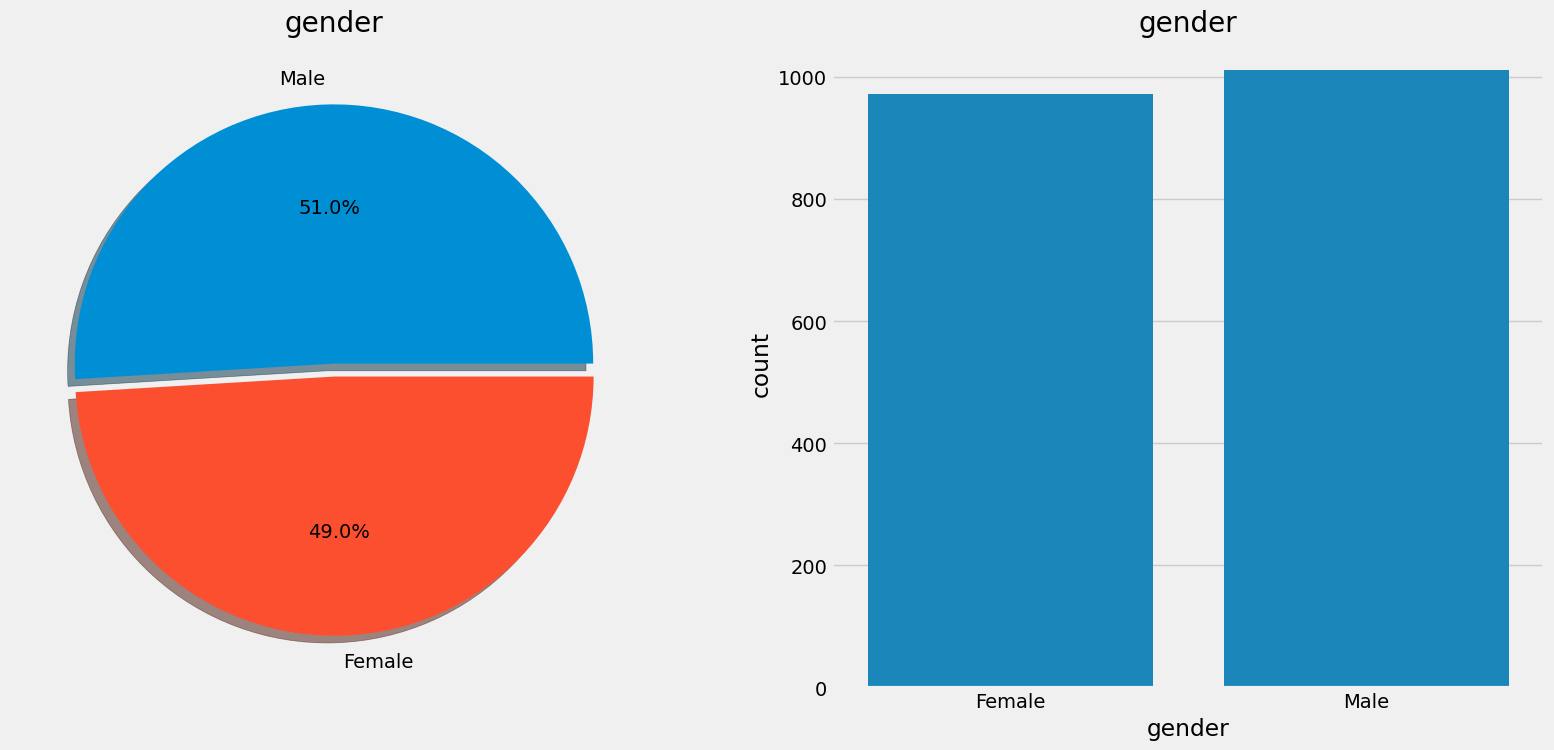

In [16]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['gender'].value_counts().plot.pie(explode = [0,0.05], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('gender')
ax[0].set_ylabel('')
sns.countplot(x='gender', data = data, ax = ax[1])
ax[1].set_title('gender')
plt.show()

In [ ]:
data.groupby('gender')['gender'].count()

Можем заметить, что процентное и количественное соотношение почти равное, следовательно можно сделать вывод, что половое соотношение не будет значительно влиять на результаты последующих закономерностей

**Определим зависмость количества студентов от названия школы**

In [102]:
data.groupby(['school'])['school'].count()

school
ANKYI     38
CCAAW    102
CIMBB     70
CUQAM     99
DNQDD    110
FBUMG     44
GJJHK    107
GOKXL     60
GOOBU    147
IDGFP     86
KFZMY     51
KZKKE    100
LAYPA     55
OJOBU     77
QOQTS    134
UAGPU     80
UKPGS    118
UUUQX     83
VHDHF     47
VKWQH     95
VVTVA    107
ZMNYA     65
ZOWMK    109
Name: school, dtype: int64

In [103]:
print('Highest n_student in school was:', data.groupby(['school'])['school'].count().max())
print('Lowest n_student in school was:', data.groupby(['school'])['school'].count().min())
print('Average n_student in school was:', data.groupby(['school'])['school'].count().mean())


Highest n_student in school was: 147
Lowest n_student in school was: 38
Average n_student in school was: 86.26086956521739


Можно заменить, что количество студентов,сдавших экзамен, в школах неравномерное

**Определим количества студентов и от местоположения школы**

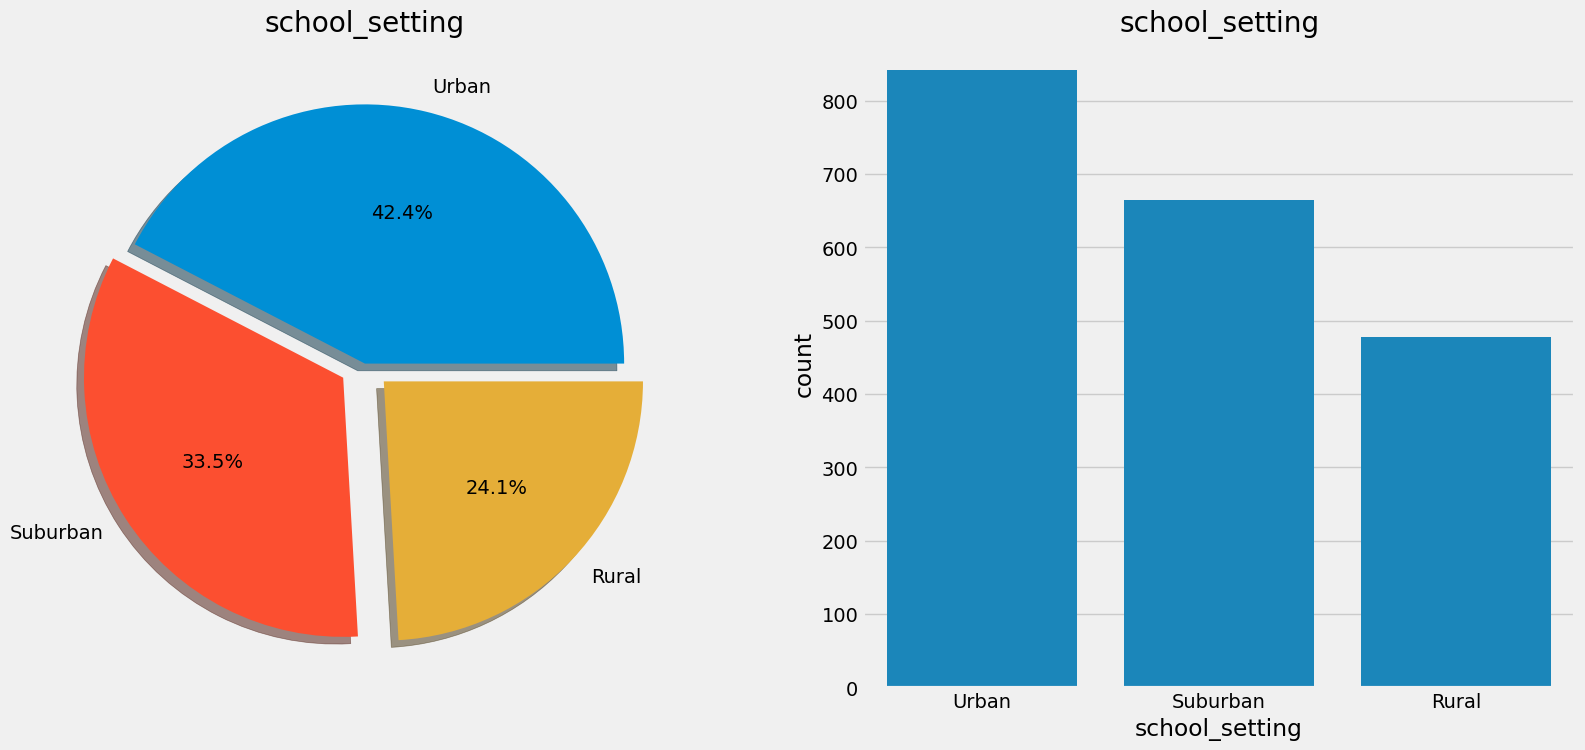

In [21]:
#нужно сделать круговую диаграмму с количественным отношением распололжения школ 
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['school_setting'].value_counts().plot.pie(explode = [0,0.1,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('school_setting')
ax[0].set_ylabel('')
sns.countplot(x='school_setting', data = data, ax = ax[1])
ax[1].set_title('school_setting')
plt.show()

Отсюда следует, что количество учеников сдававших экзамены, в городе больше, чем в селе ы 2 раза


убедимся в этом количественно

In [131]:
data.groupby(['school_setting'])['school_setting'].count()

school_setting
Rural       478
Suburban    665
Urban       841
Name: school_setting, dtype: int64

данные показывают, что больше всего школьников из Urban, эти % соотношения стоит учитывать 

**Определим зависимость пола и  оценок от местоположения школы**

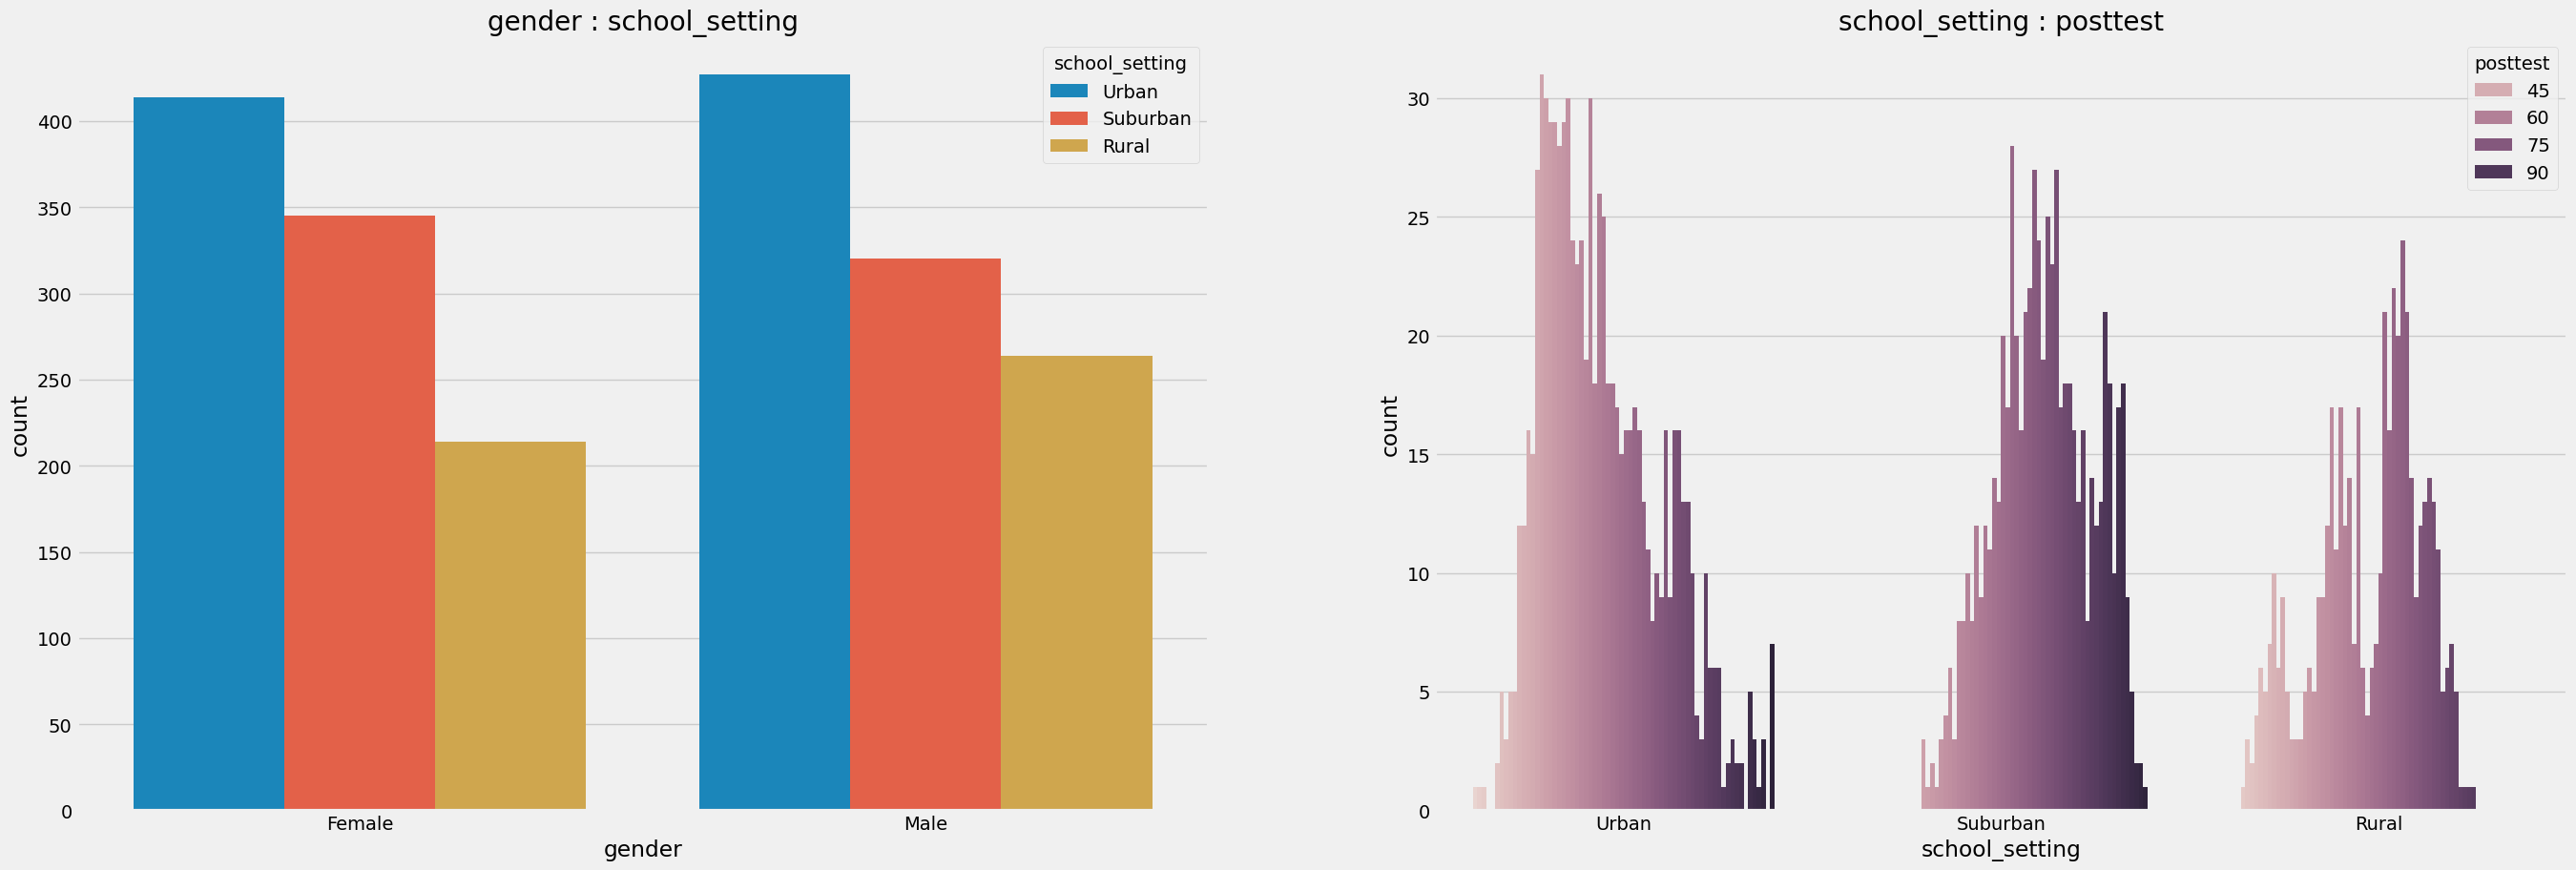

In [20]:
f, ax = plt.subplots(1, 2, figsize = (30, 10))
sns.countplot(x='gender', hue = 'school_setting', data = data, ax = ax[0])
ax[0].set_title('gender : school_setting')
sns.countplot(x='school_setting', hue = 'posttest', data = data, ax = ax[1])
ax[1].set_title('school_setting : posttest')
plt.show()

1 график показал распределение полов по расположению школ (пригород выделяется тем, что преобладает количество женского пола над мужским, в городе и селе противоположная тенденция, по сравнению с пригородом) 

2 график показывает распределение posttest по расположению школ, можно заметить что в пригороде преобладают темные цвета(то есть высокие оценки), следовательно именно в этом городе больше ребят, сдавшие на высокие баллы, в городе же присутствуют высокобалльники, но преобладают ребята с низкими баллами, в селе же среднее значение баллов, но абсолютно нет высокобалльников 
Можно сказать в школах из пригорода выше получить высокую и среднюю оценку, чем в другим школах, в школах из села высок шанс получить среднюю оценку, но не высокую, в школах из города высок шанс получить малый балл, но есть шанс получить средний или высокий балл

**Определим зависимость названия школы от местоположения школы**

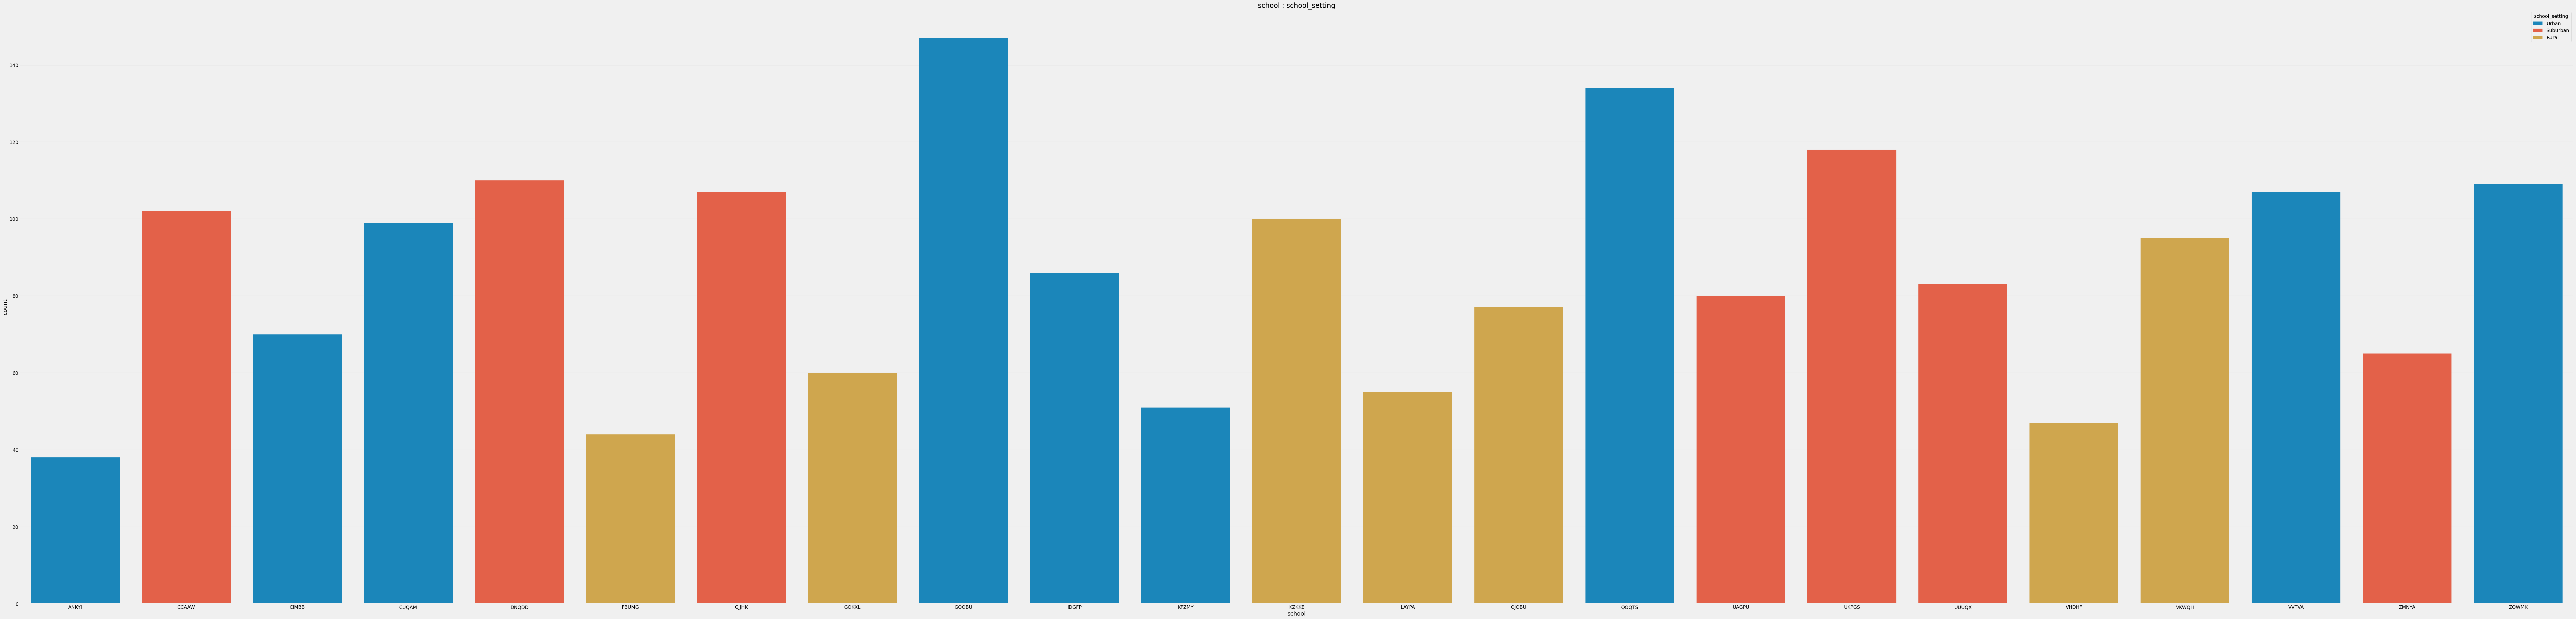

In [50]:
f, ax = plt.subplots(1,1, figsize = (120, 30))
sns.countplot(x='school', hue = 'school_setting', data = data, ax = ax)
ax.set_title('school : school_setting')
plt.show()

в школе UKPGS выше шанс у школьников получить высокий балл, так как они из пригорода и их больше, в школе GOOBU из города высок шанс получить малый балл, в школе KZKEE из села высок шанс получить средний балл

**Определим зависимость типа школы от местоположения школы**

In [112]:
data.groupby('school_type')['school_type'].count()


school_type
Non-public     521
Public        1463
Name: school_type, dtype: int64

Разница почти в 3 раза

Text(0.5, 1.0, 'school_setting : school_type')

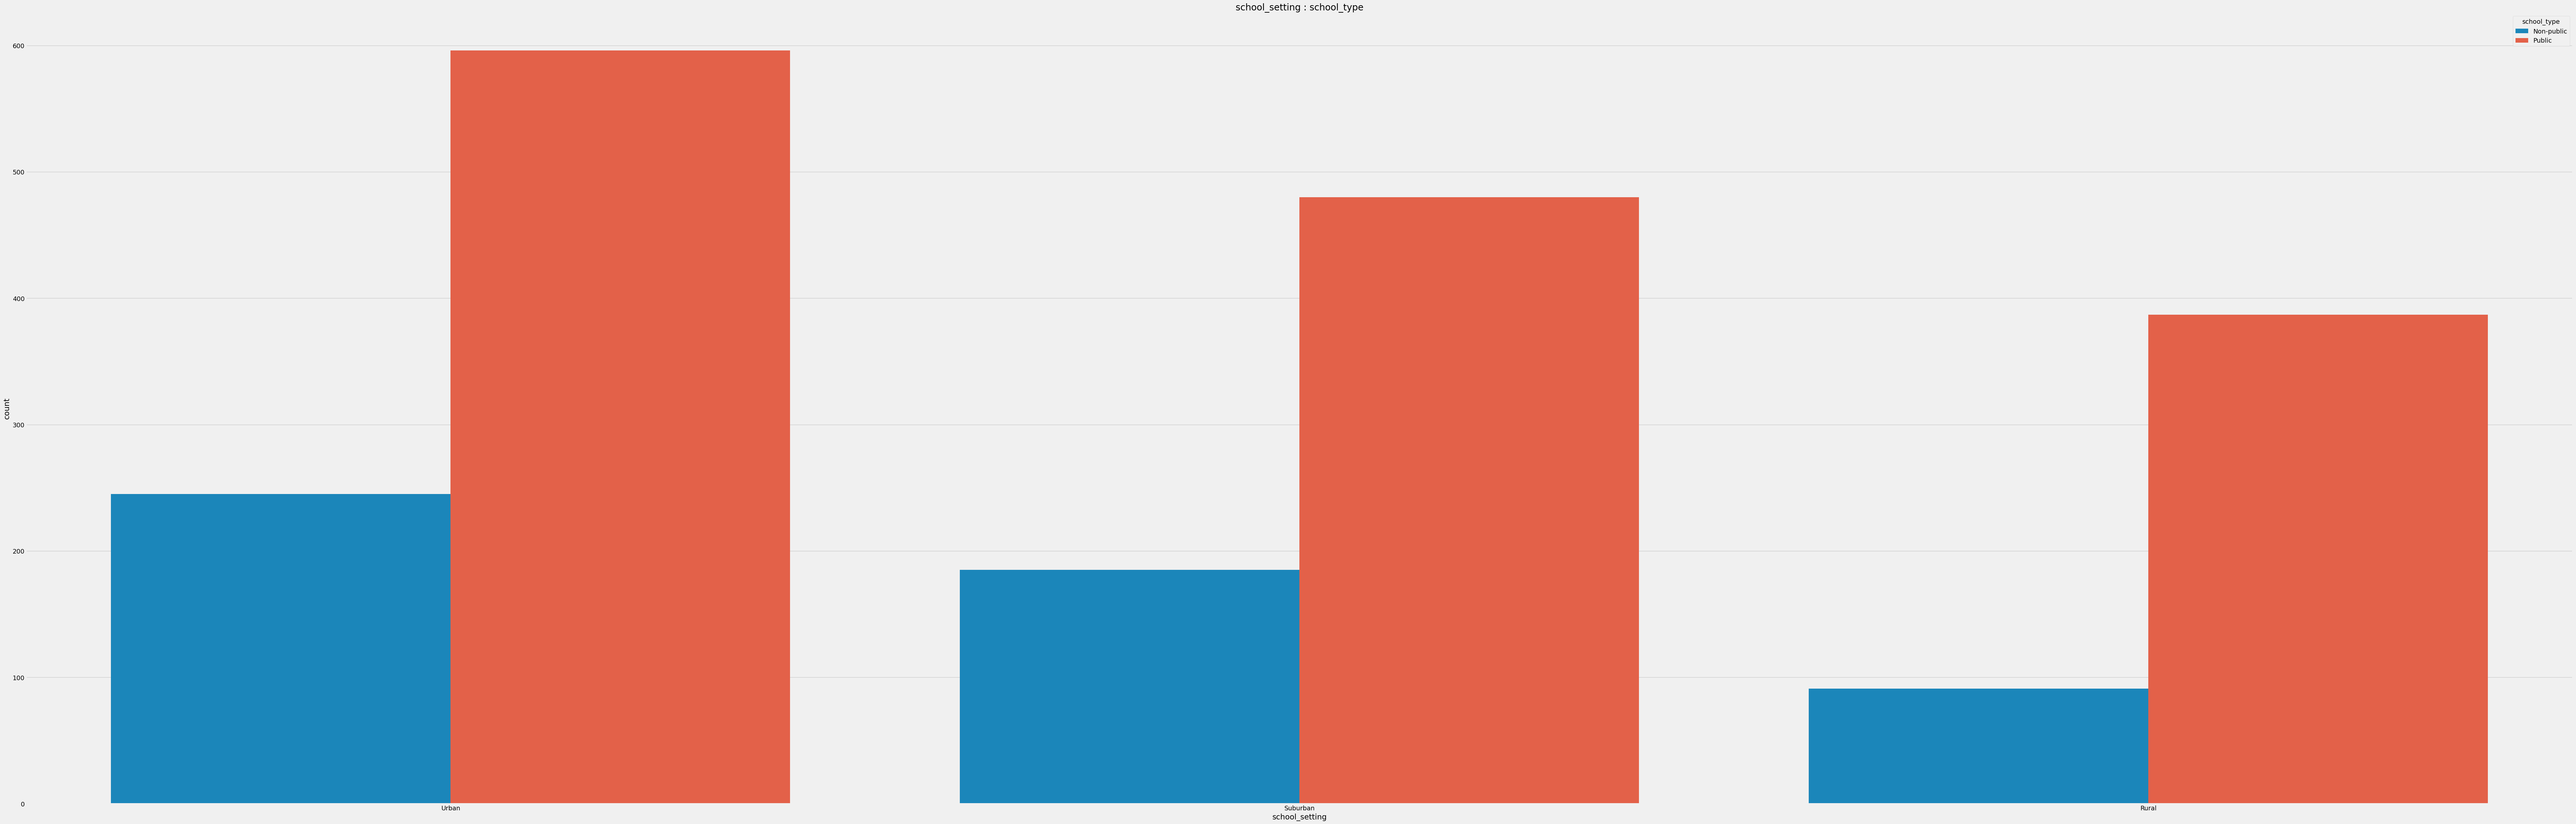

In [36]:
f, ax = plt.subplots(1, 1, figsize = (90, 30))
sns.countplot(x='school_setting', hue = 'school_type', data = data, ax = ax)
ax.set_title('school_setting : school_type')

 график показывает соотношение типов школ по городам,селам и пригородам, везде преобладает Public

**Определим зависимость типа школы от названия школы**


Text(0.5, 1.0, 'school : school_type')

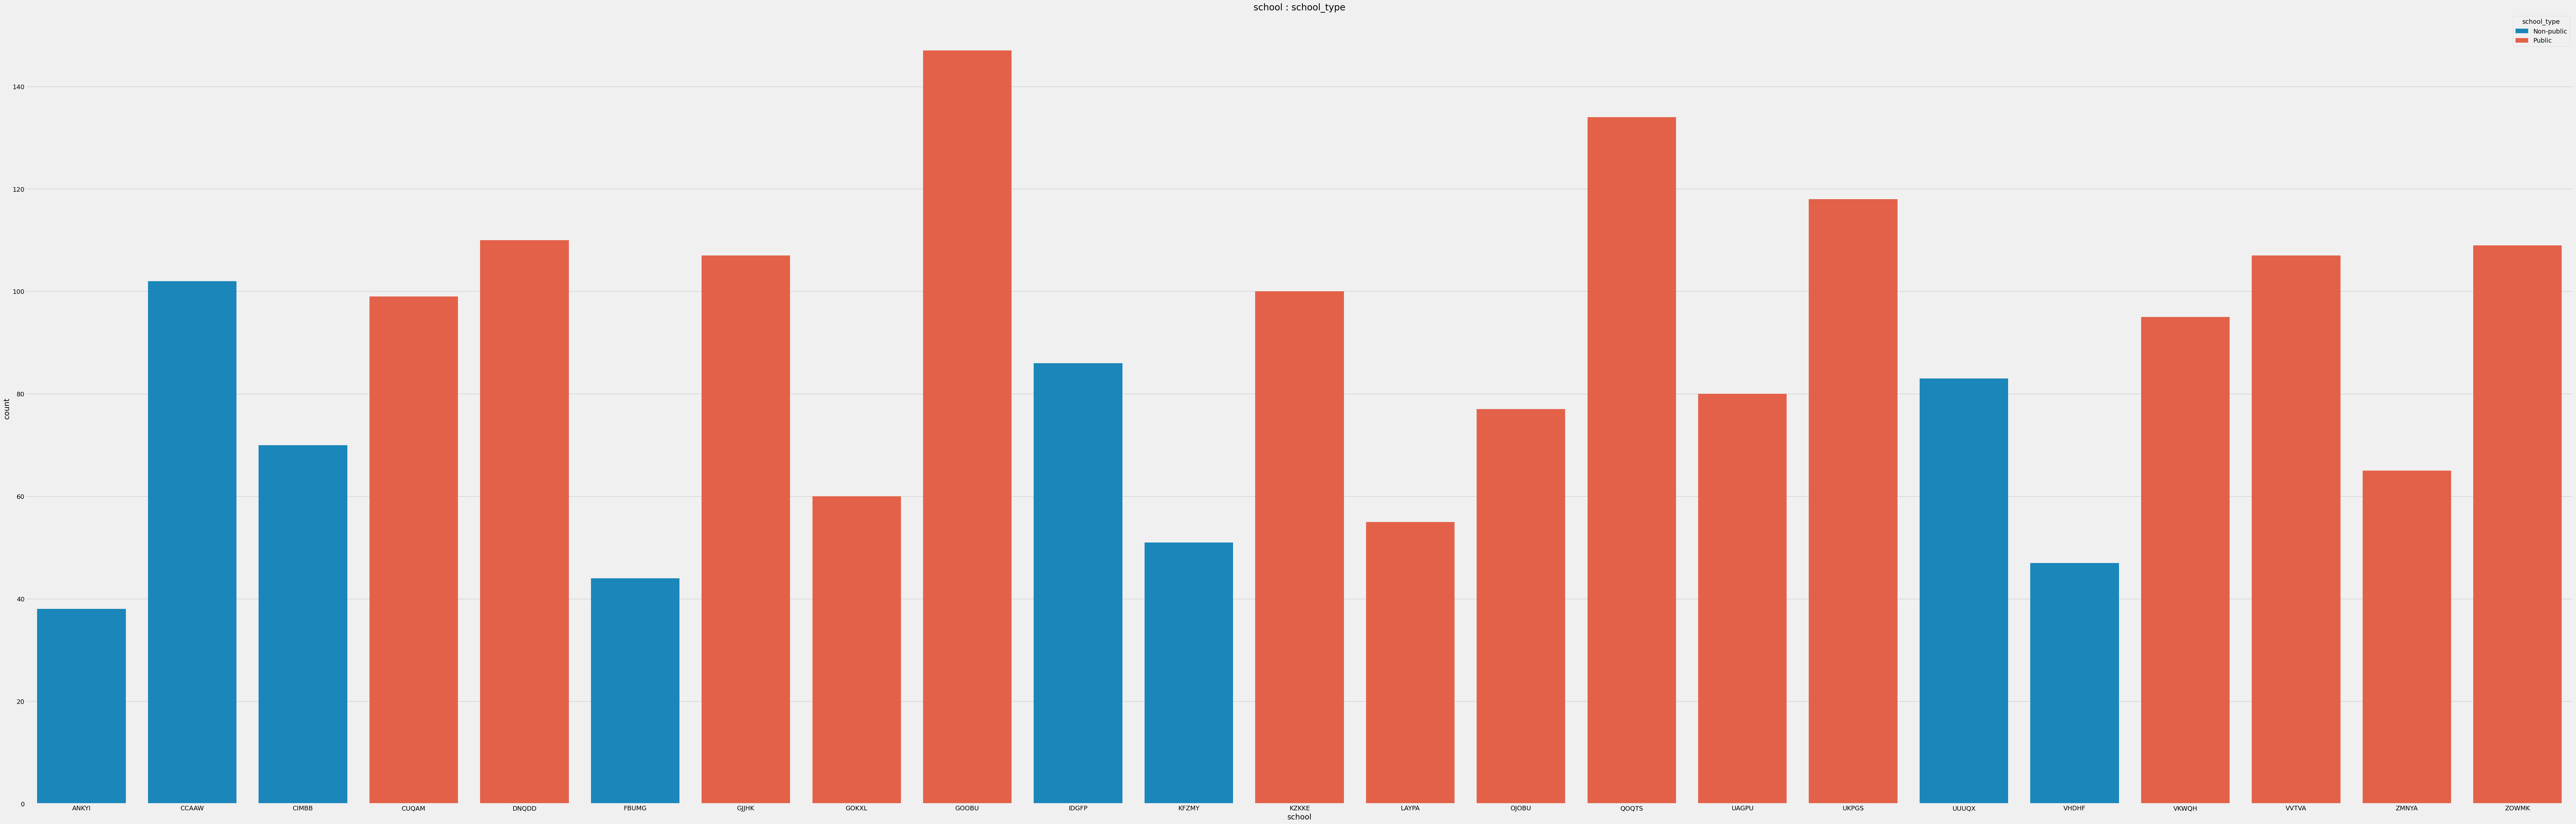

In [52]:
f, ax = plt.subplots(1, 1, figsize = (90, 30))
sns.countplot(x='school', hue = 'school_type', data = data, ax = ax)
ax.set_title('school : school_type')

Были рассмотрены школы, в которых предположительно можно получить высокую, среднюю и низкую оценки и везде был в графике выше был тип школы - public- поэтому пока не выявлено его влияние на оценки

**Рассмотрим типы школы и полученные оценки**

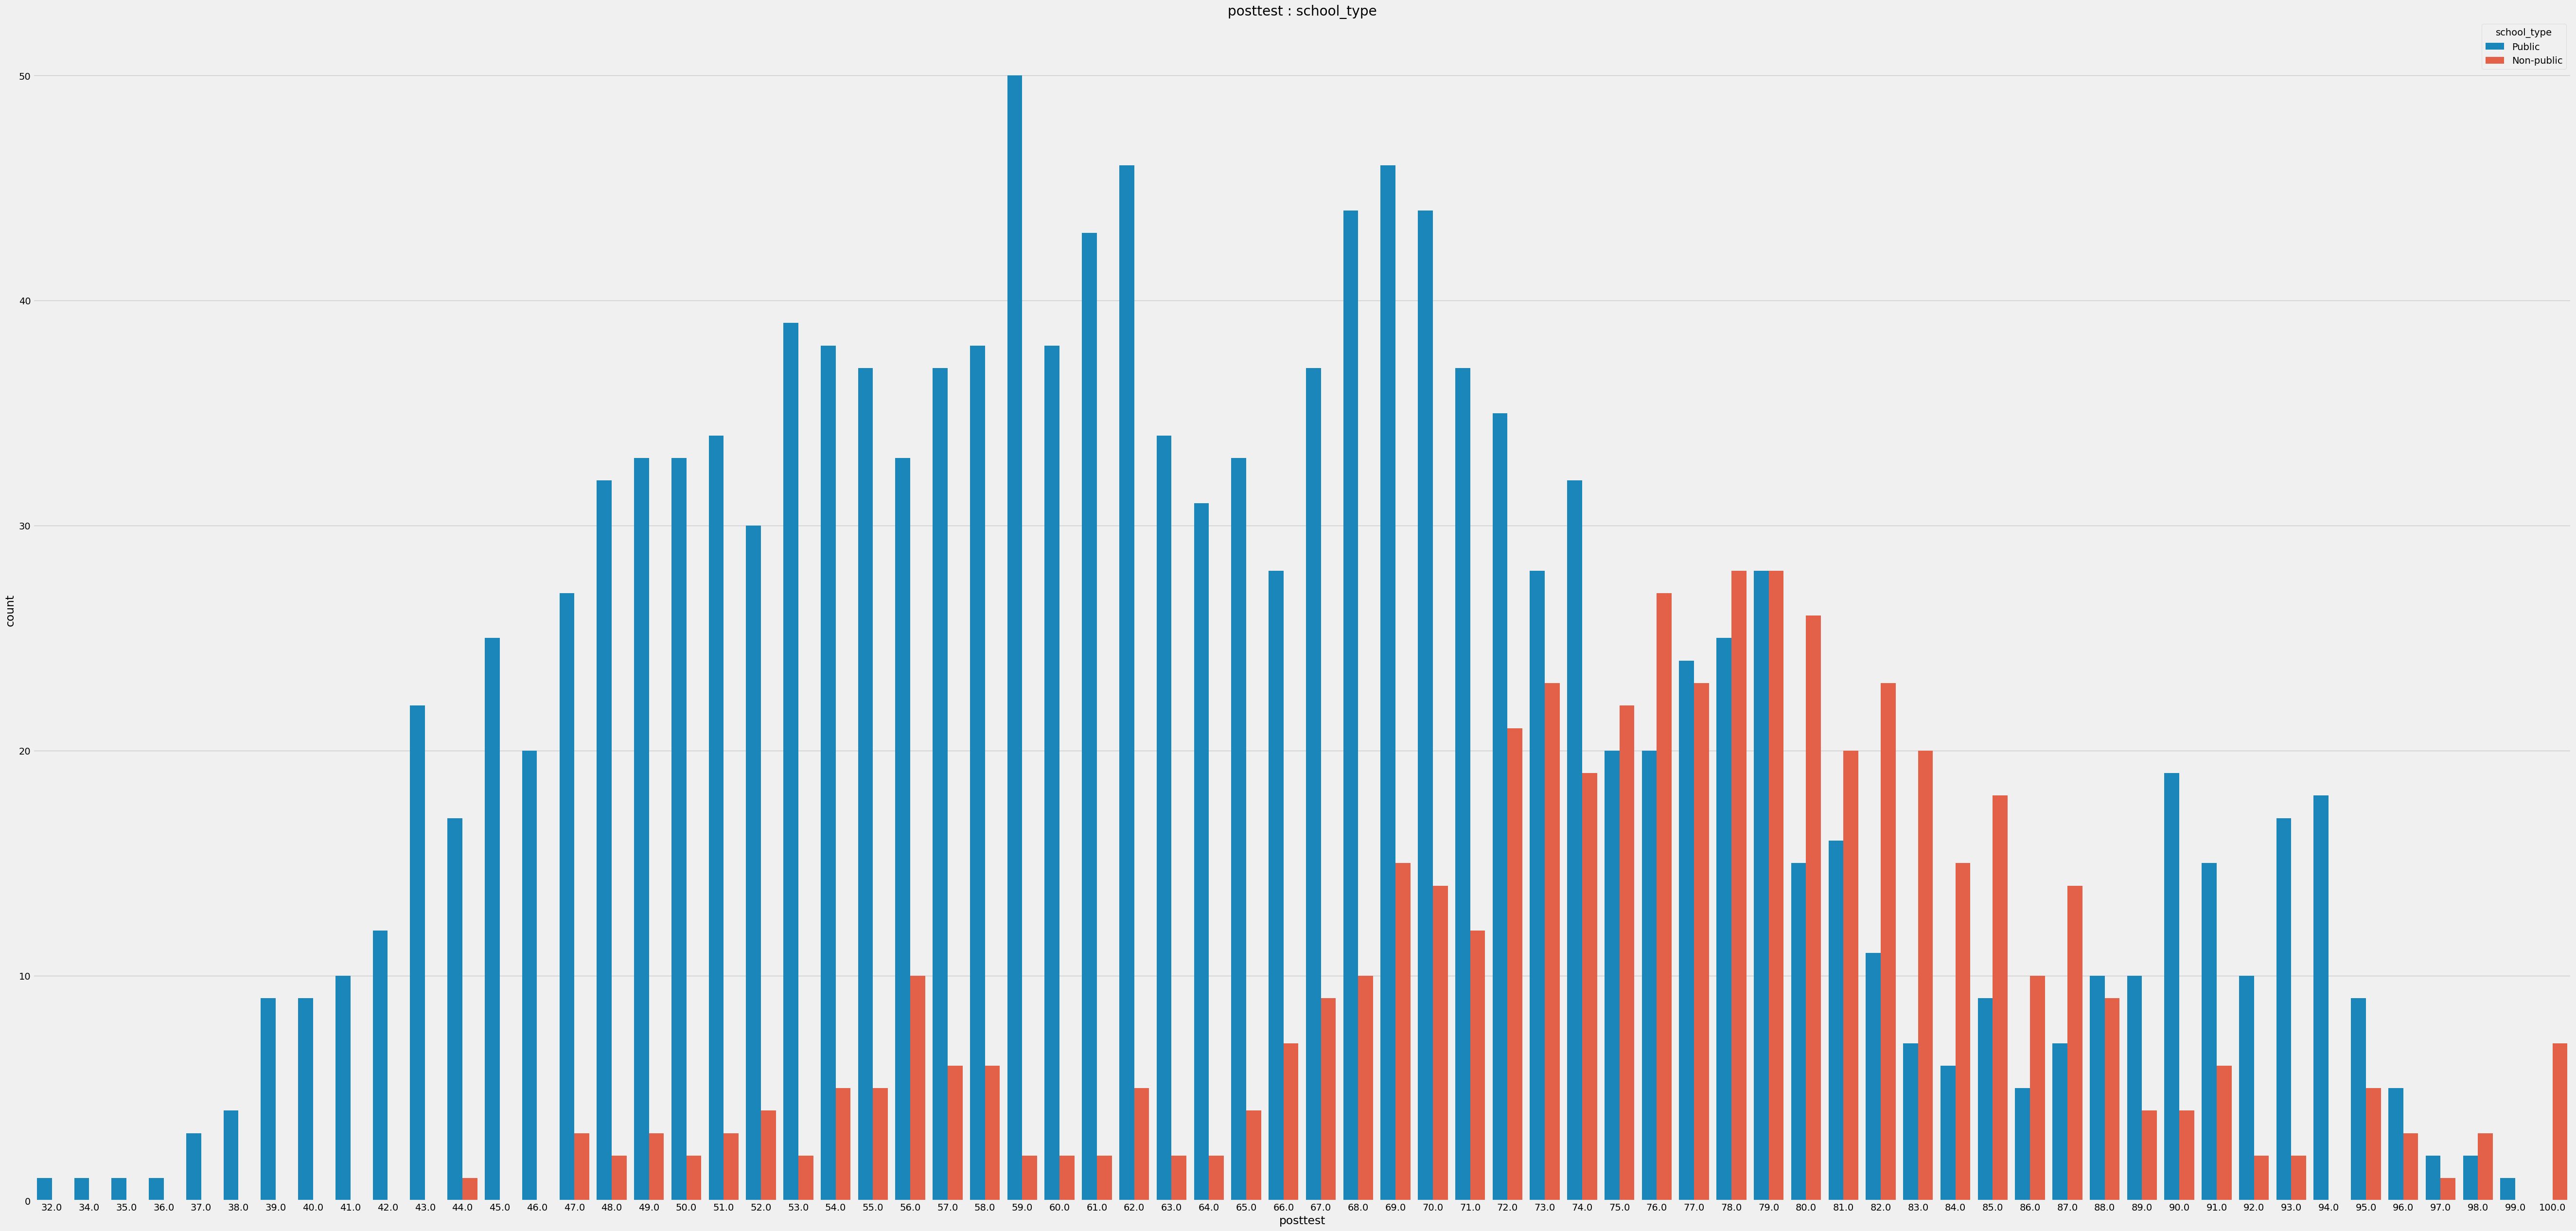

In [111]:
#рассмотрим типы преподавания и полученные оценки
f, ax = plt.subplots(1, 1, figsize = (60, 30))
sns.countplot(x='posttest', hue = 'school_type', data = data, ax = ax)
ax.set_title('posttest : school_type')
plt.show()

Этот график же показывает значительное смещение непубличных школ в сторону высоких и средних оценок, так же можно заметить, что именно в непубличной школе ребята смогли сдать экзамен на 100 баллов, в публичной же школьники сдавали и на низкие баллы, так же пик графика на баллах от 50-75

Делаем вывод, что этот признак стоит учитывать

**Рассмотрим методы преподавания в школах по школам**


In [110]:
data.groupby('teaching_method')['n_student'].count()


teaching_method
Experimental     710
Standard        1274
Name: n_student, dtype: int64

Разница в количестве почти в 2 раза

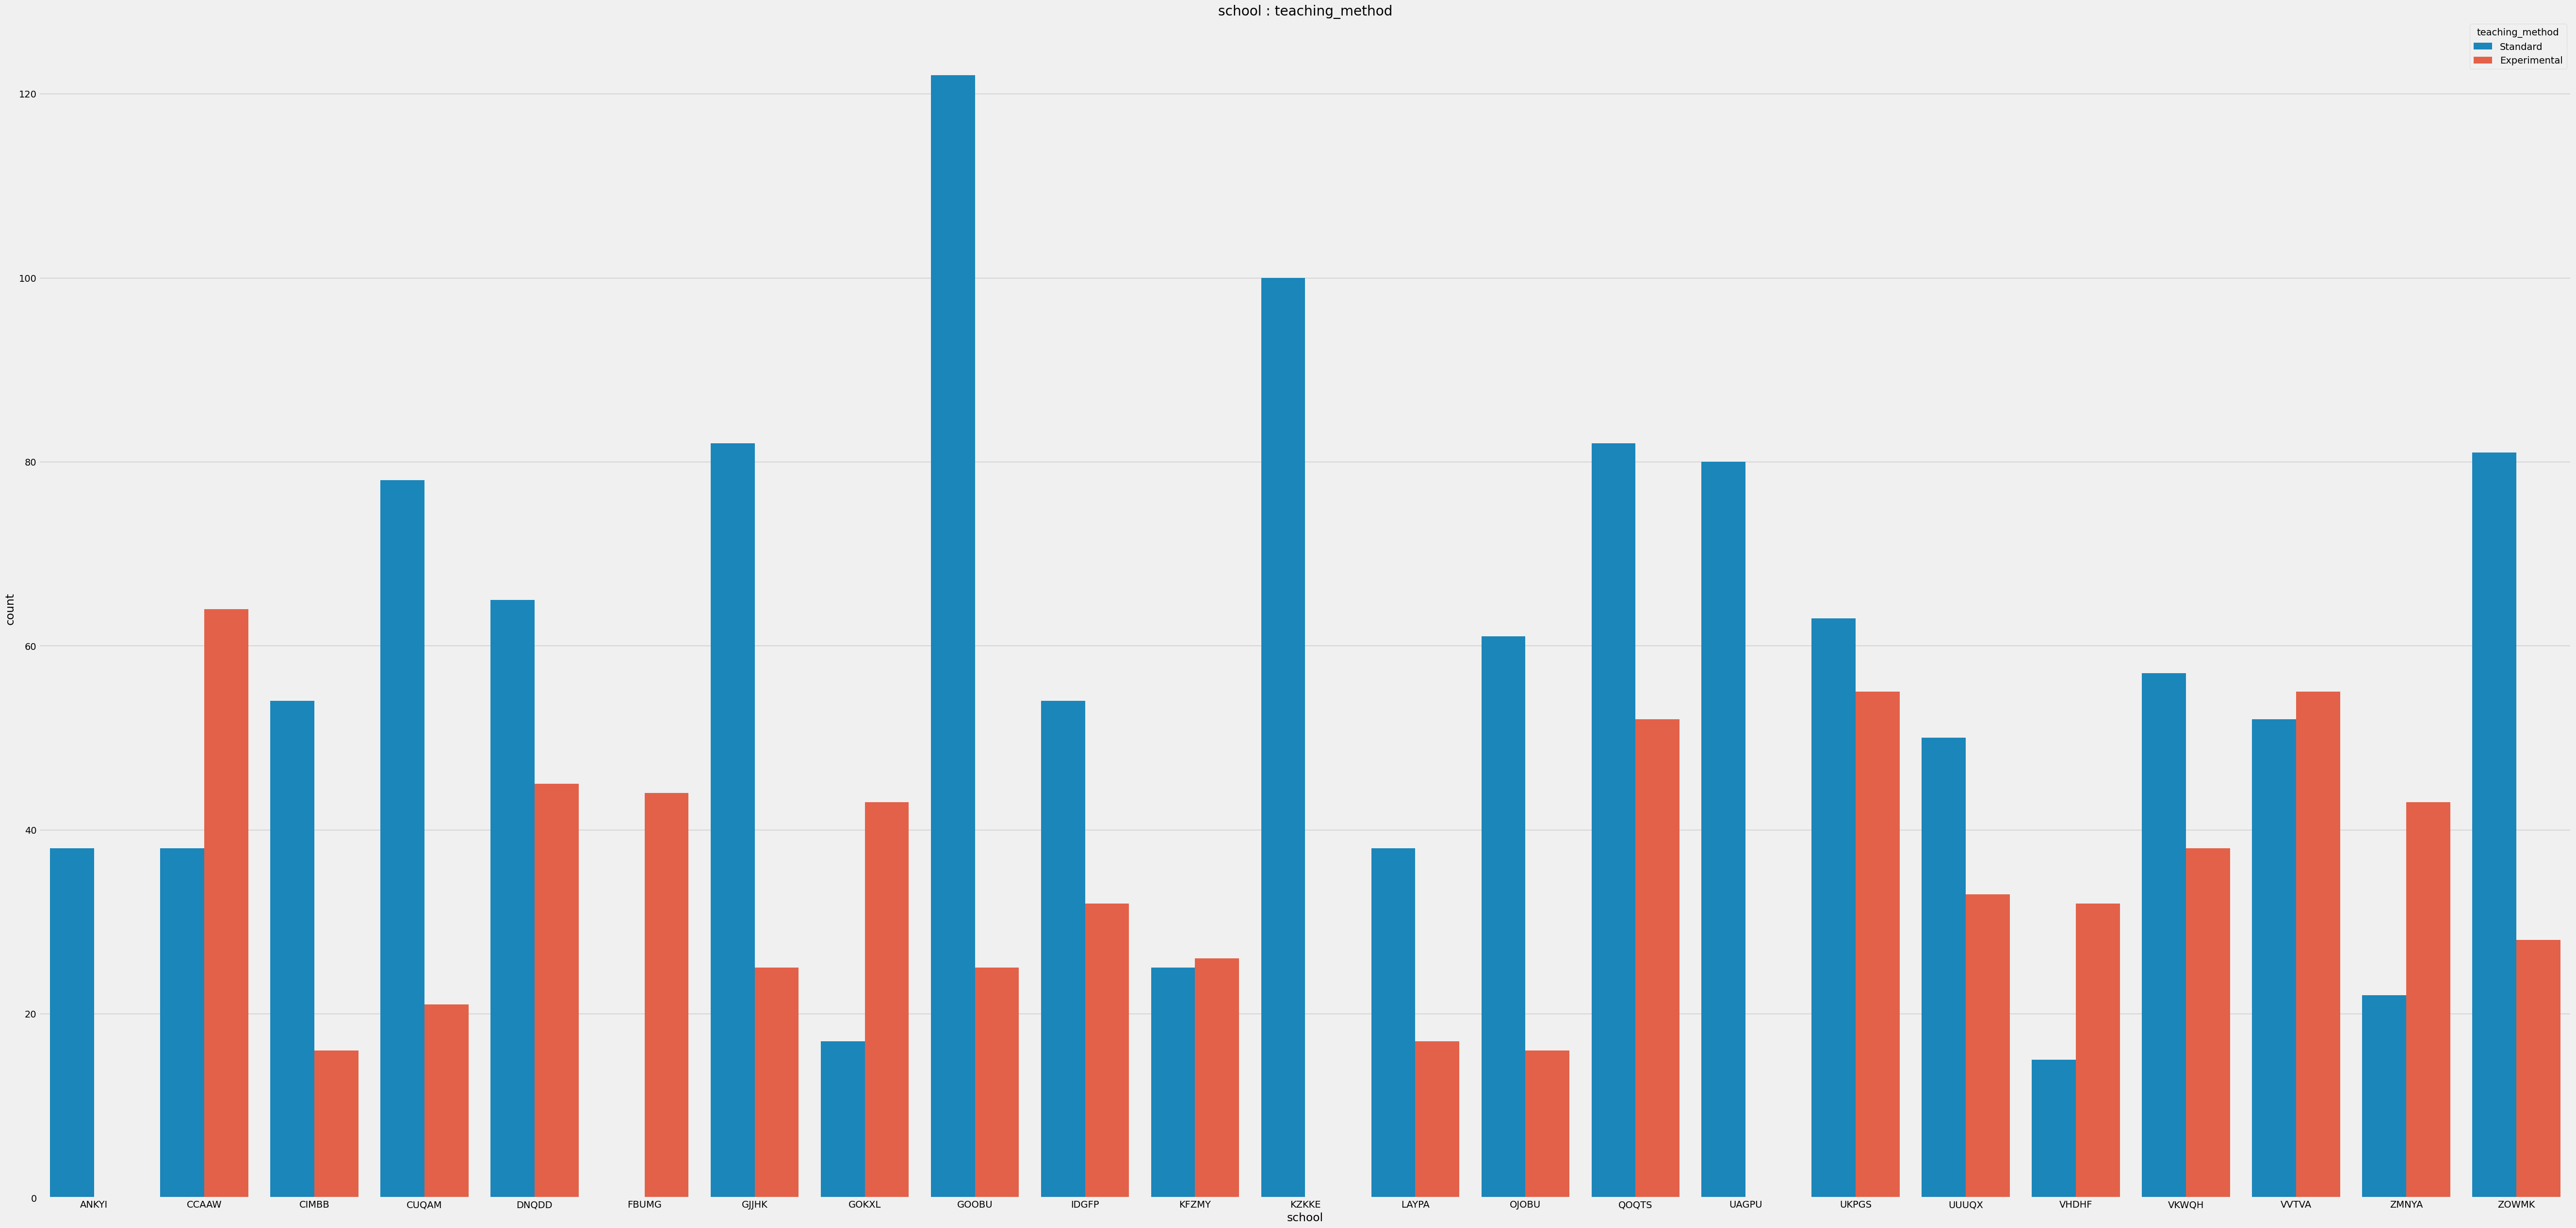

In [188]:
f, ax = plt.subplots(1, 1, figsize = (60, 30))
sns.countplot(x='school', hue = 'teaching_method', data = data, ax = ax)
ax.set_title('school : teaching_method')
plt.show()

в школе UKPGS выше шанс получить высокие баллы в стандартном типе обучения, в школе GOOBU из Urban высок шанс получить малый балл, но там так же стандартный тип обучения, в школе KZKEE из Rural тоже станадартный тип обучения, но высок шанс получить средний балл
В данном случае тип обучения не выявил точных возможностей получения того или иного балла

как и в примере выше не совсем понятно, влияние этого признака

**Рассмотрим типы преподавания и полученные оценки**

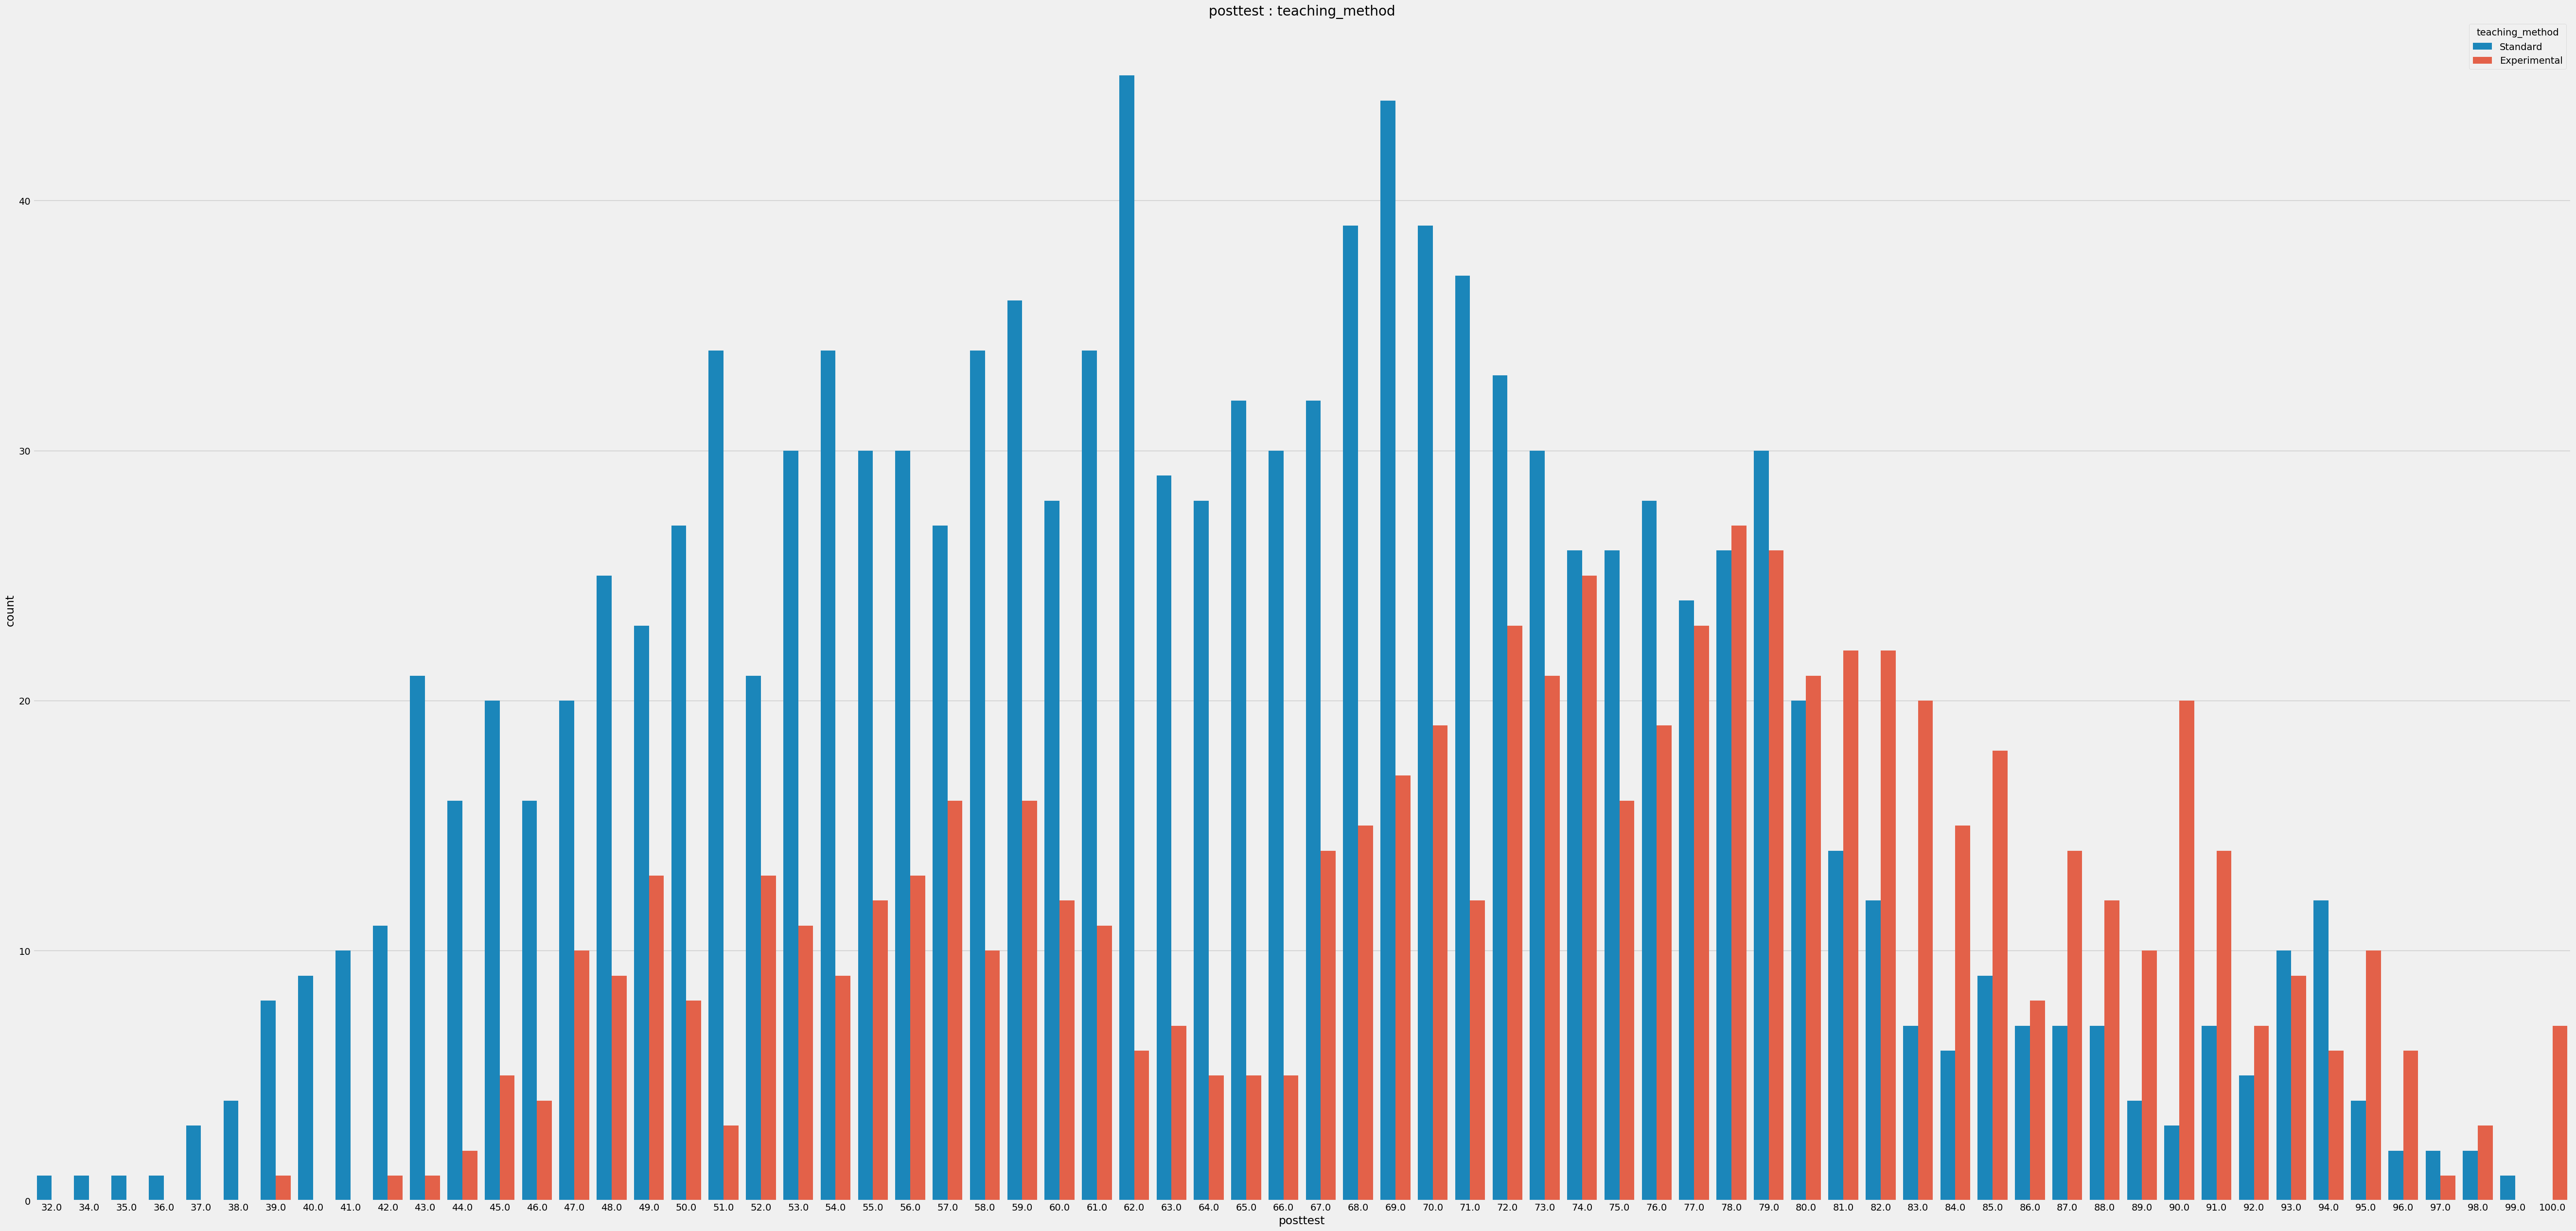

In [189]:

f, ax = plt.subplots(1, 1, figsize = (60, 30))
sns.countplot(x='posttest', hue = 'teaching_method', data = data, ax = ax)
ax.set_title('posttest : teaching_method')
plt.show()

данный график показывает, что в экспериментальном типе обучения выше шансы получить высокие и средние баллы, в стандартном больше шанс получить средние баллы

Стоит заметить,  что график распределения очень похож на график типа школ и  оценок. Можно сделать вывод, что оба признака связь между собой, но при этом в графике выше присутсвует локальный пик в экспериментальном методе обучения в баллах от 45-63

**Дополнительное исследование**

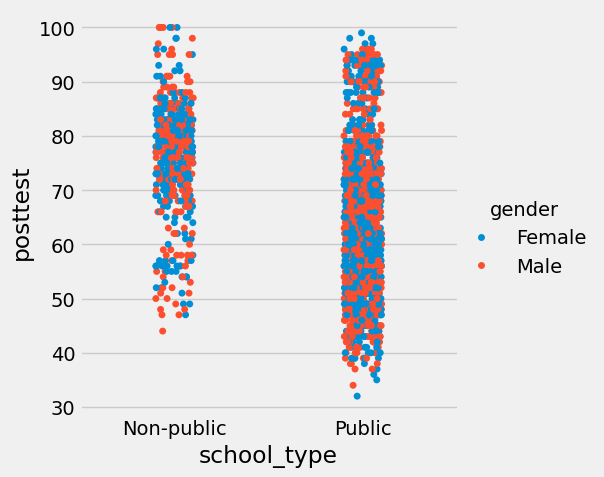

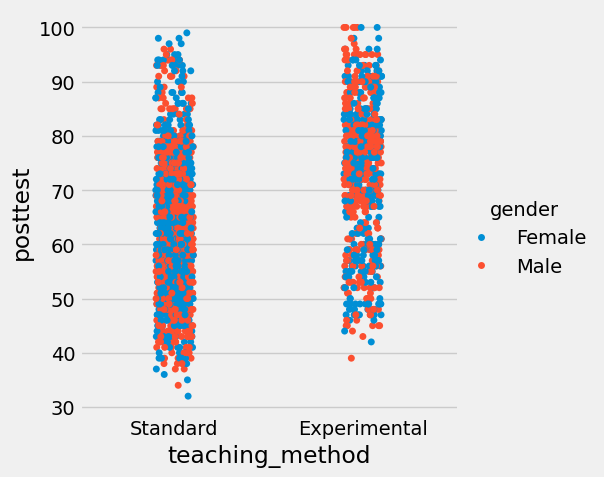

In [113]:
sns.catplot(x='school_type', y='posttest', hue = 'gender', data = data)
sns.catplot(x='teaching_method', y='posttest', hue = 'gender', data = data)
plt.show()


Данные графики доказали, что в непубличной школе график смещен к высоким баллым, вероятные баллы в это школе: 65-90,также стоит учитывать, что в непубличной школе обучается в 3 раза меньше учеников.
В экспериментальном обучении значения смещены к высоким баллам, так же стоит учитывать, что школьников для данного типа обучения меньше в 2 раза, следовательно шанс высоких баллов в экспериментальном типе обучения выше

**Определим зависимость послетестовой оценки от количества студентов**

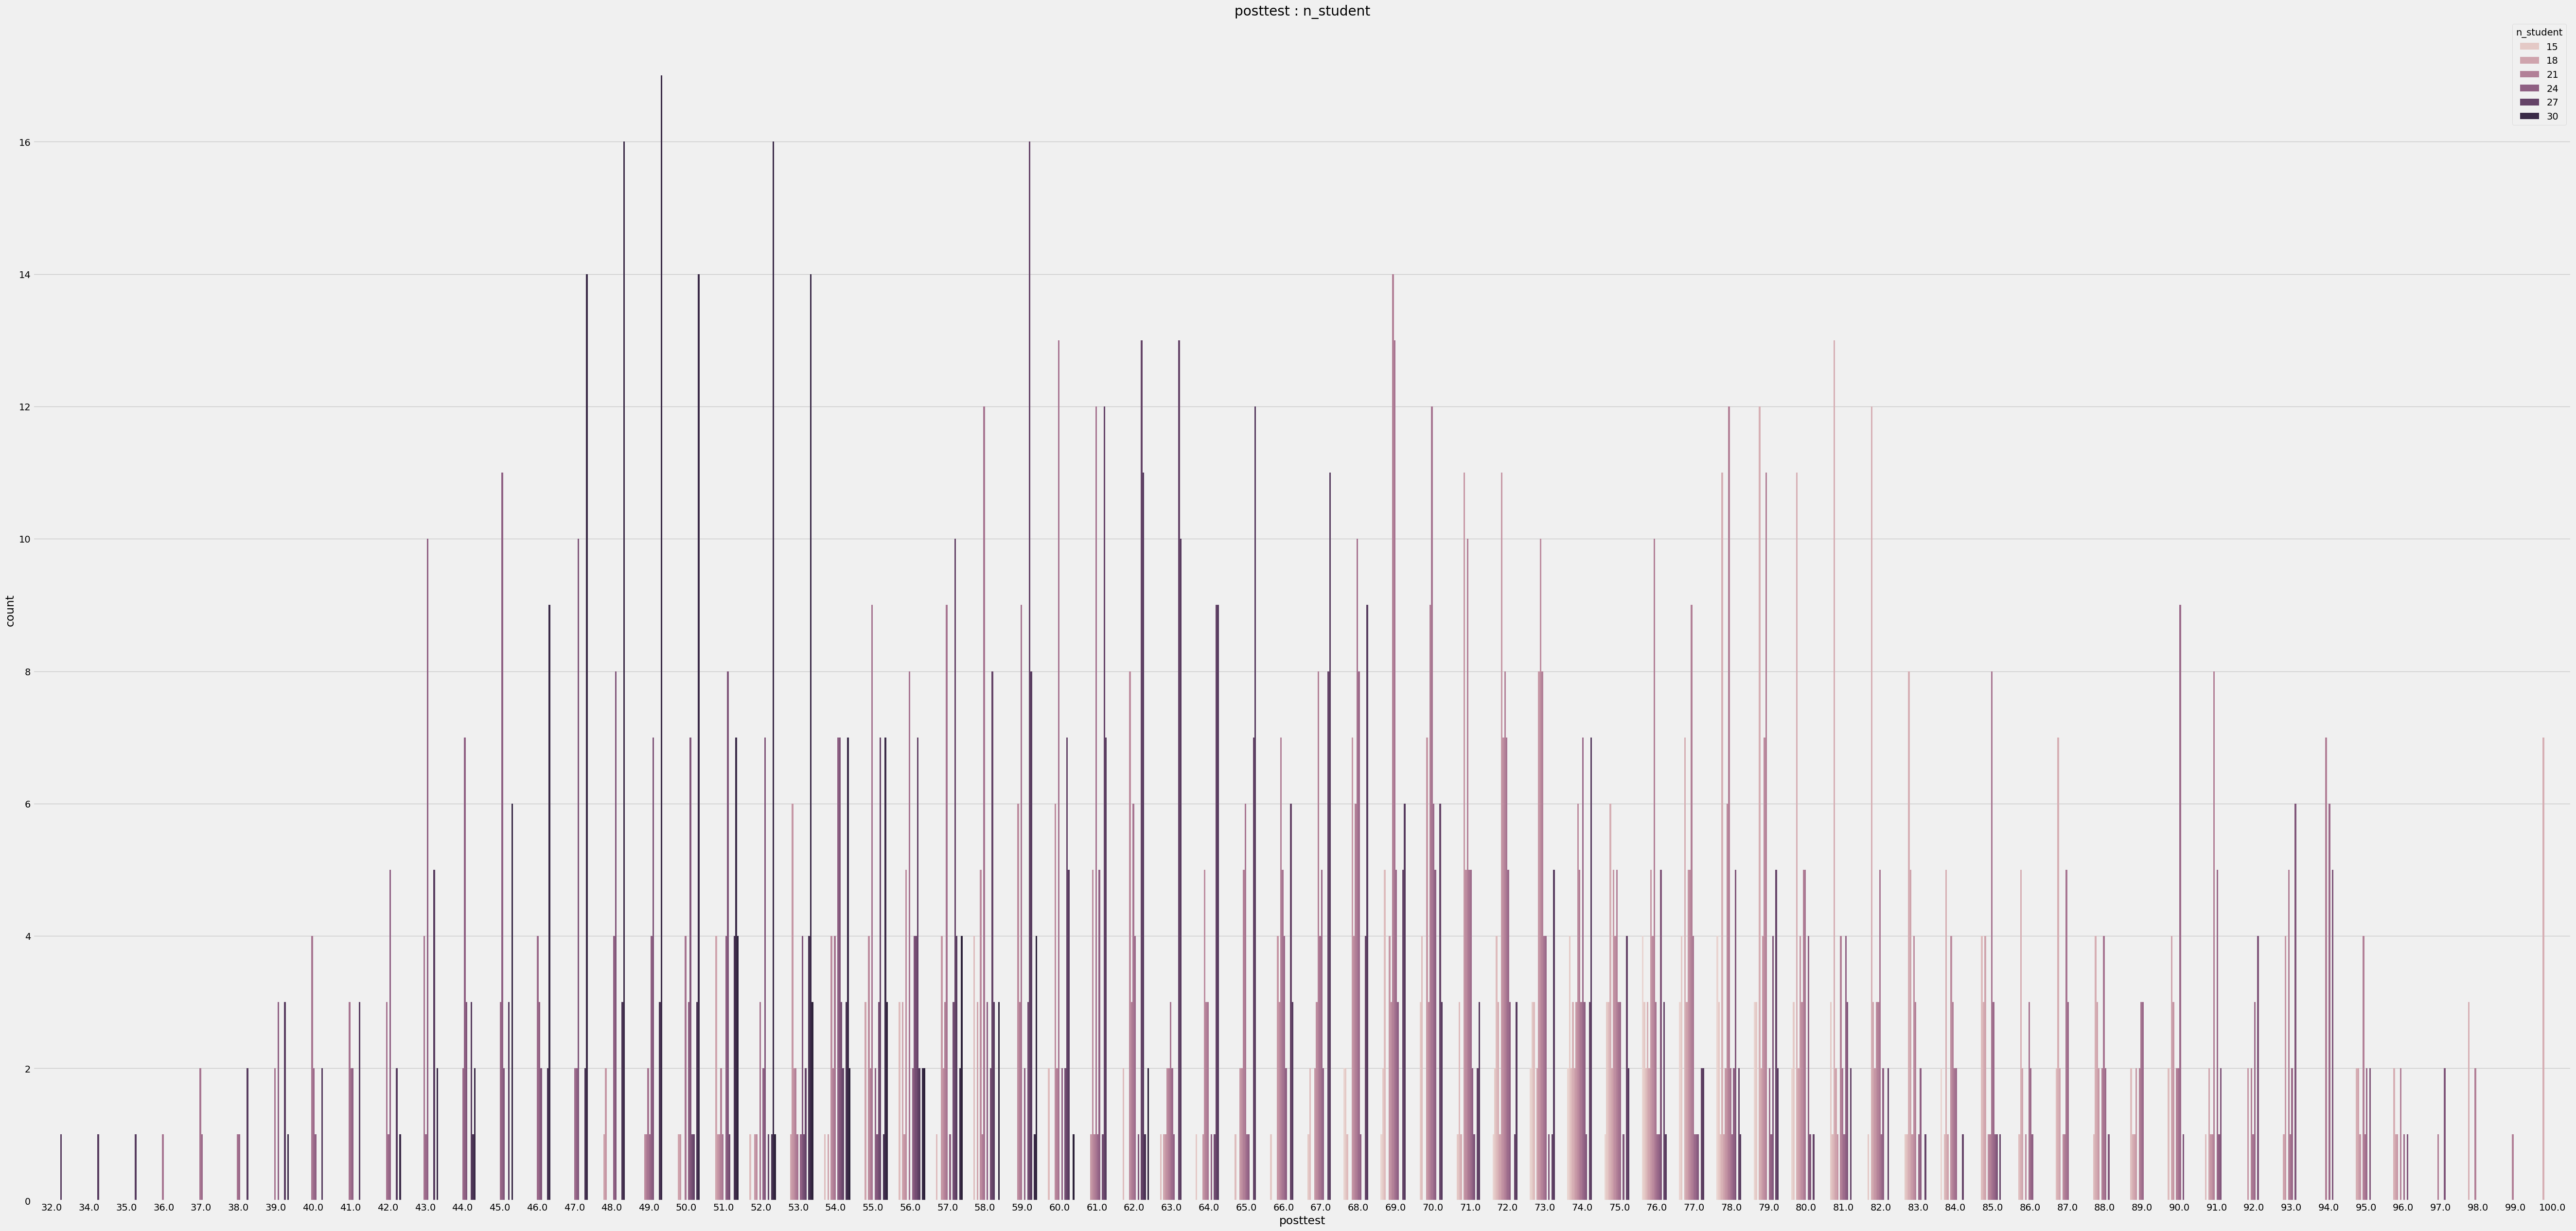

In [148]:
f, ax = plt.subplots(1, 1, figsize = (60, 30))
sns.countplot(x='posttest', hue = 'n_student', data = data,ax=ax)
ax.set_title('posttest : n_student')
plt.show()

темного цвета (высокие оценки) в центр больше, а именно в центре-среднее количество учеников

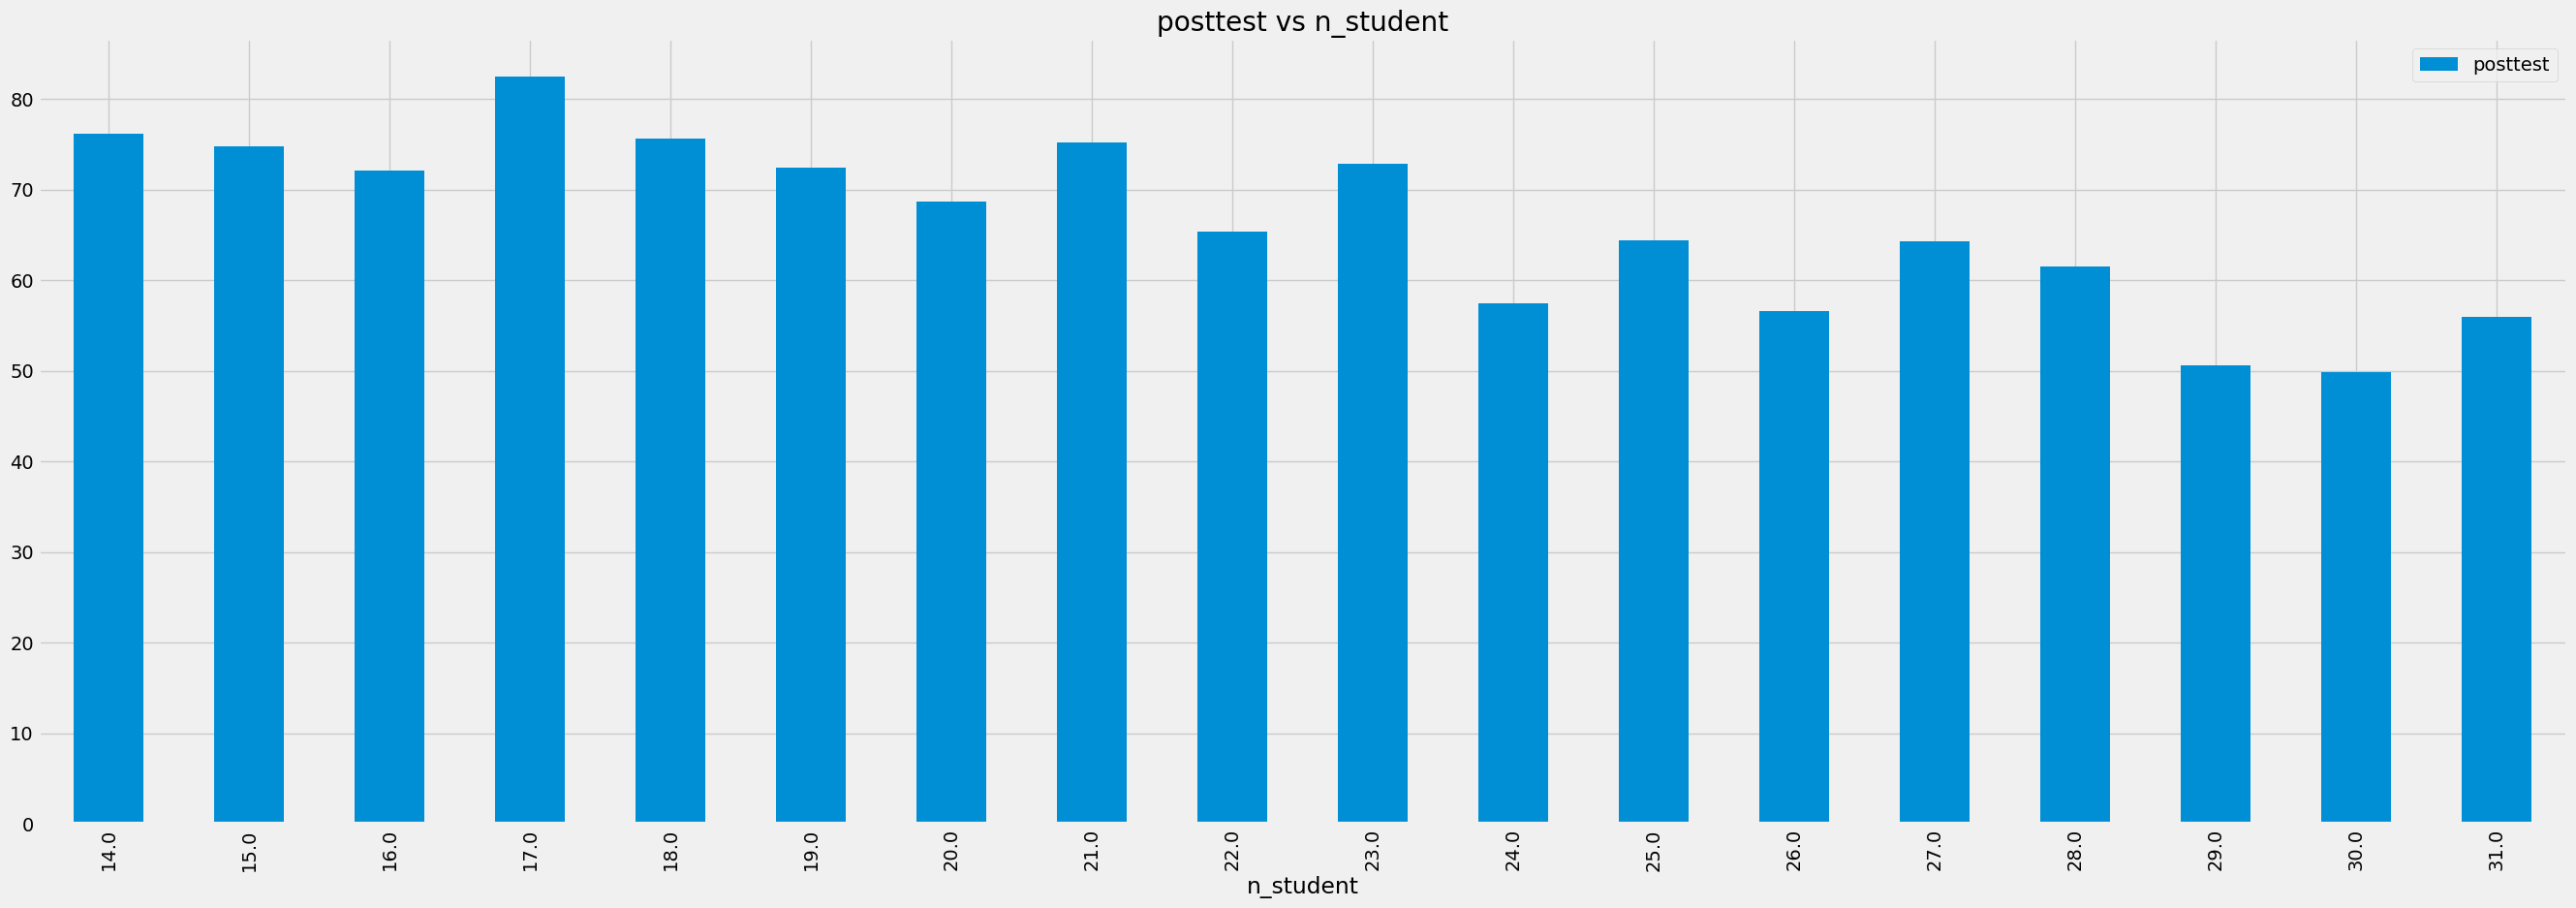

In [149]:
f, ax = plt.subplots(1,1, figsize = (30, 10))
data[['n_student','posttest']].groupby(['n_student']).mean().plot.bar(ax = ax)
ax.set_title('posttest vs n_student')
plt.show()

данные графики показывают явную зависимость количества учеников в классе и послетестовые оценки, возможно это связано с индивидуальным подходом в каждому ученику в классах, где учеников меньше

**Зависимость послетестовой оценки и признака уникального индентификтора для каждого ученика**

Учитывать не будем, так как для каждого ученика свой индентификатор, и построить зависимость здесь невозможно

**Определим зависимость оценок от пола**

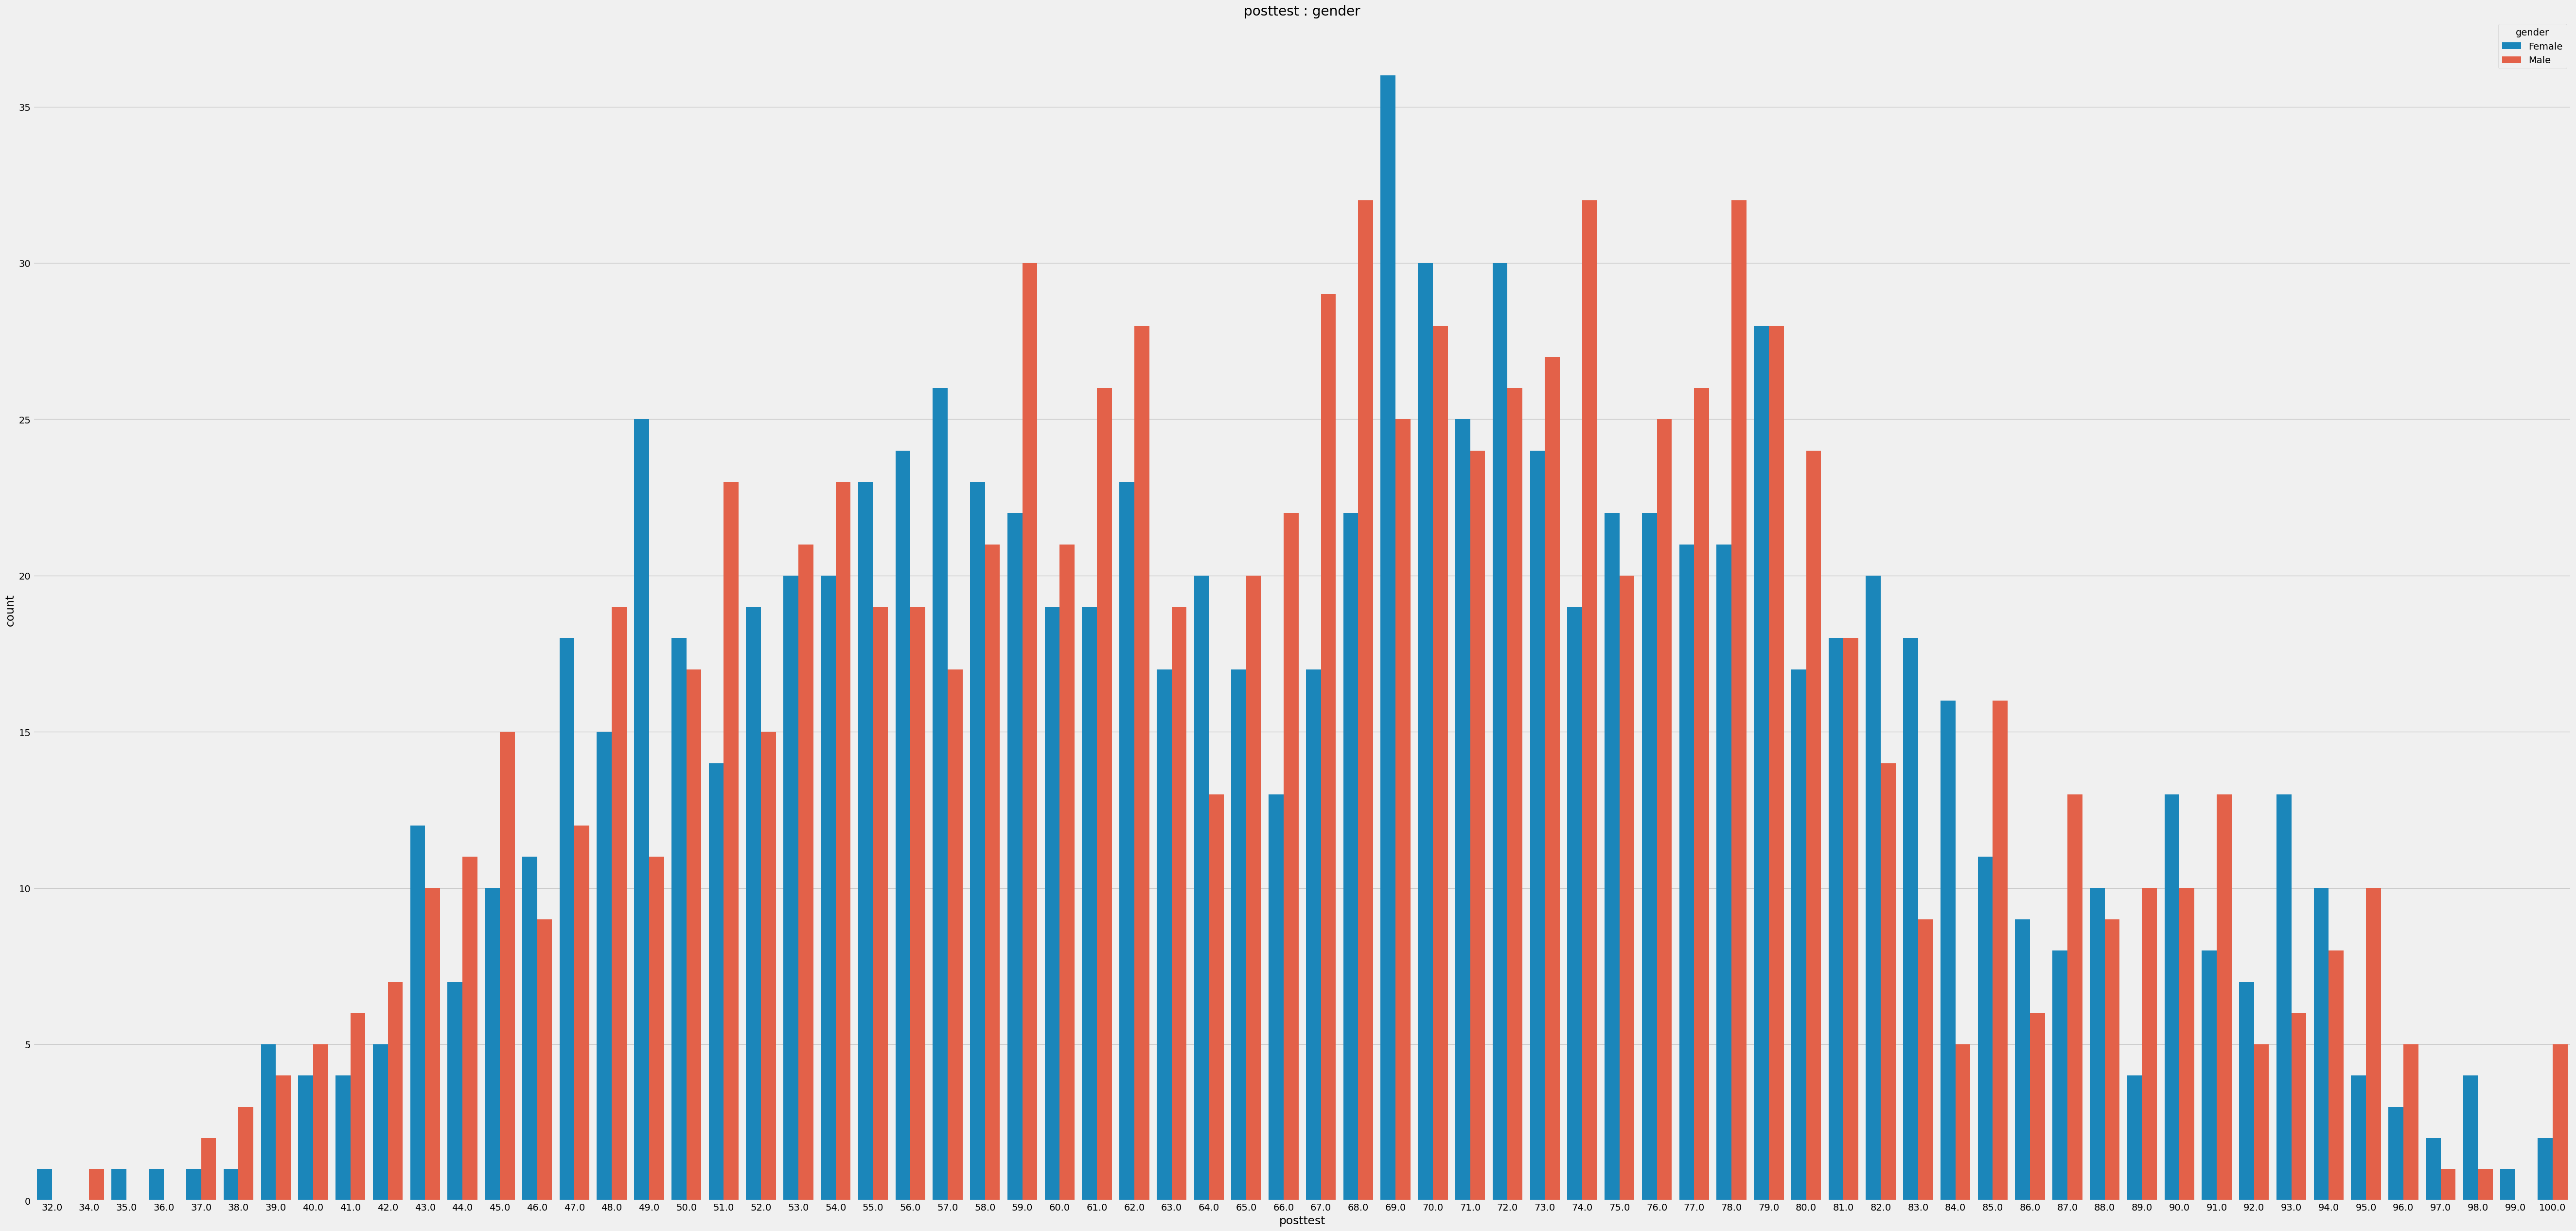

In [191]:
f, ax = plt.subplots(1, 1, figsize = (60, 30))
sns.countplot(x='posttest', hue = 'gender', data = data,ax=ax)
ax.set_title('posttest : gender')
plt.show()

как можно заметить в данном графике нет преобладания одного пола над другим, следовательно тяжело точно сказать зависимость оценки о пола в данном случае

Также один из первых графиков был - распределение полов, где процентное отношение было почти одинаковы, следовательно данный признак учитывать не будем

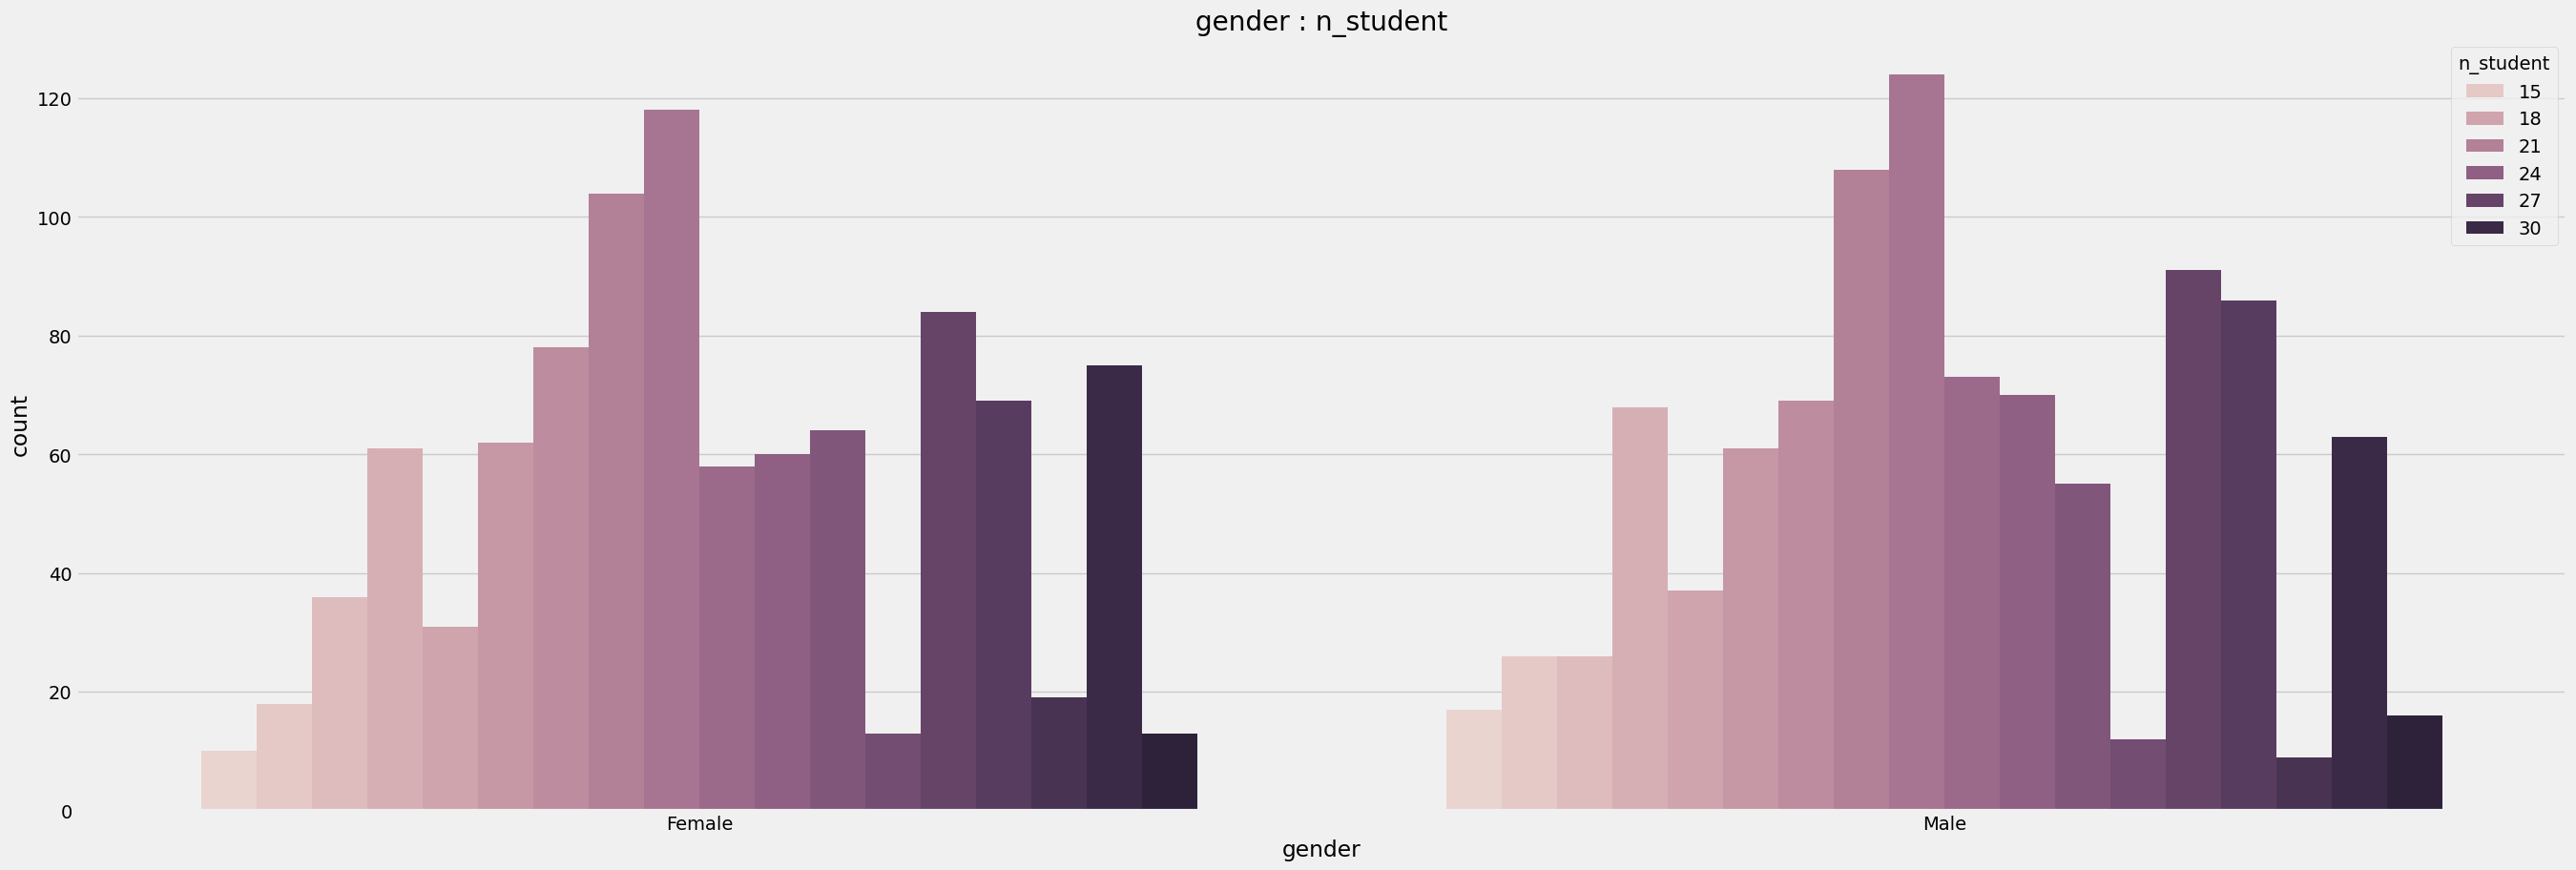

In [109]:
f, ax = plt.subplots(1, 1, figsize = (30, 10))
sns.countplot(x='gender', hue = 'n_student', data = data, ax = ax)
ax.set_title('gender : n_student')
plt.show()

также этот график показывает, что половое соотношение школьников в классе практически идентично

**Зависимость оценок от классной комнаты**

In [62]:
data.groupby(['classroom'])['n_student'].count()

classroom
05H    22
08N    20
0N7    28
18K    29
197    13
       ..
YTB    28
YUC    18
ZBH    29
ZDT    24
ZNS    20
Name: n_student, Length: 97, dtype: int64

In [68]:
print('Highest n_student in classroom was:', data.groupby(['classroom'])['n_student'].count().max())
print('Lowest n_student in classroom was:', data.groupby(['classroom'])['n_student'].count().min())
print('Average n_student in classroom was:', data.groupby(['classroom'])['n_student'].count().mean())


Highest n_student in classroom was: 29
Lowest n_student in classroom was: 13
Average n_student in classroom was: 20.45360824742268


Можно заметить что разница между самым малым количеством школьников и самым большим количеством в классах 16 человек, что не такое большое число и плюс минус в классах было в среднем 20 человек 

In [87]:
f, ax = plt.subplots(1, 1, figsize = (200,200))
sns.countplot(x='classroom', hue = 'posttest', data = data,ax=ax)
ax.set_title('classroom : posttest')
plt.show()

Если расмотреть цвета каждого графика для каждый классной комнаты, то можно заметить, что есть комнаты с преобладающим темным цветом(высокие оценки), а есть со светлым(низкие оценки)

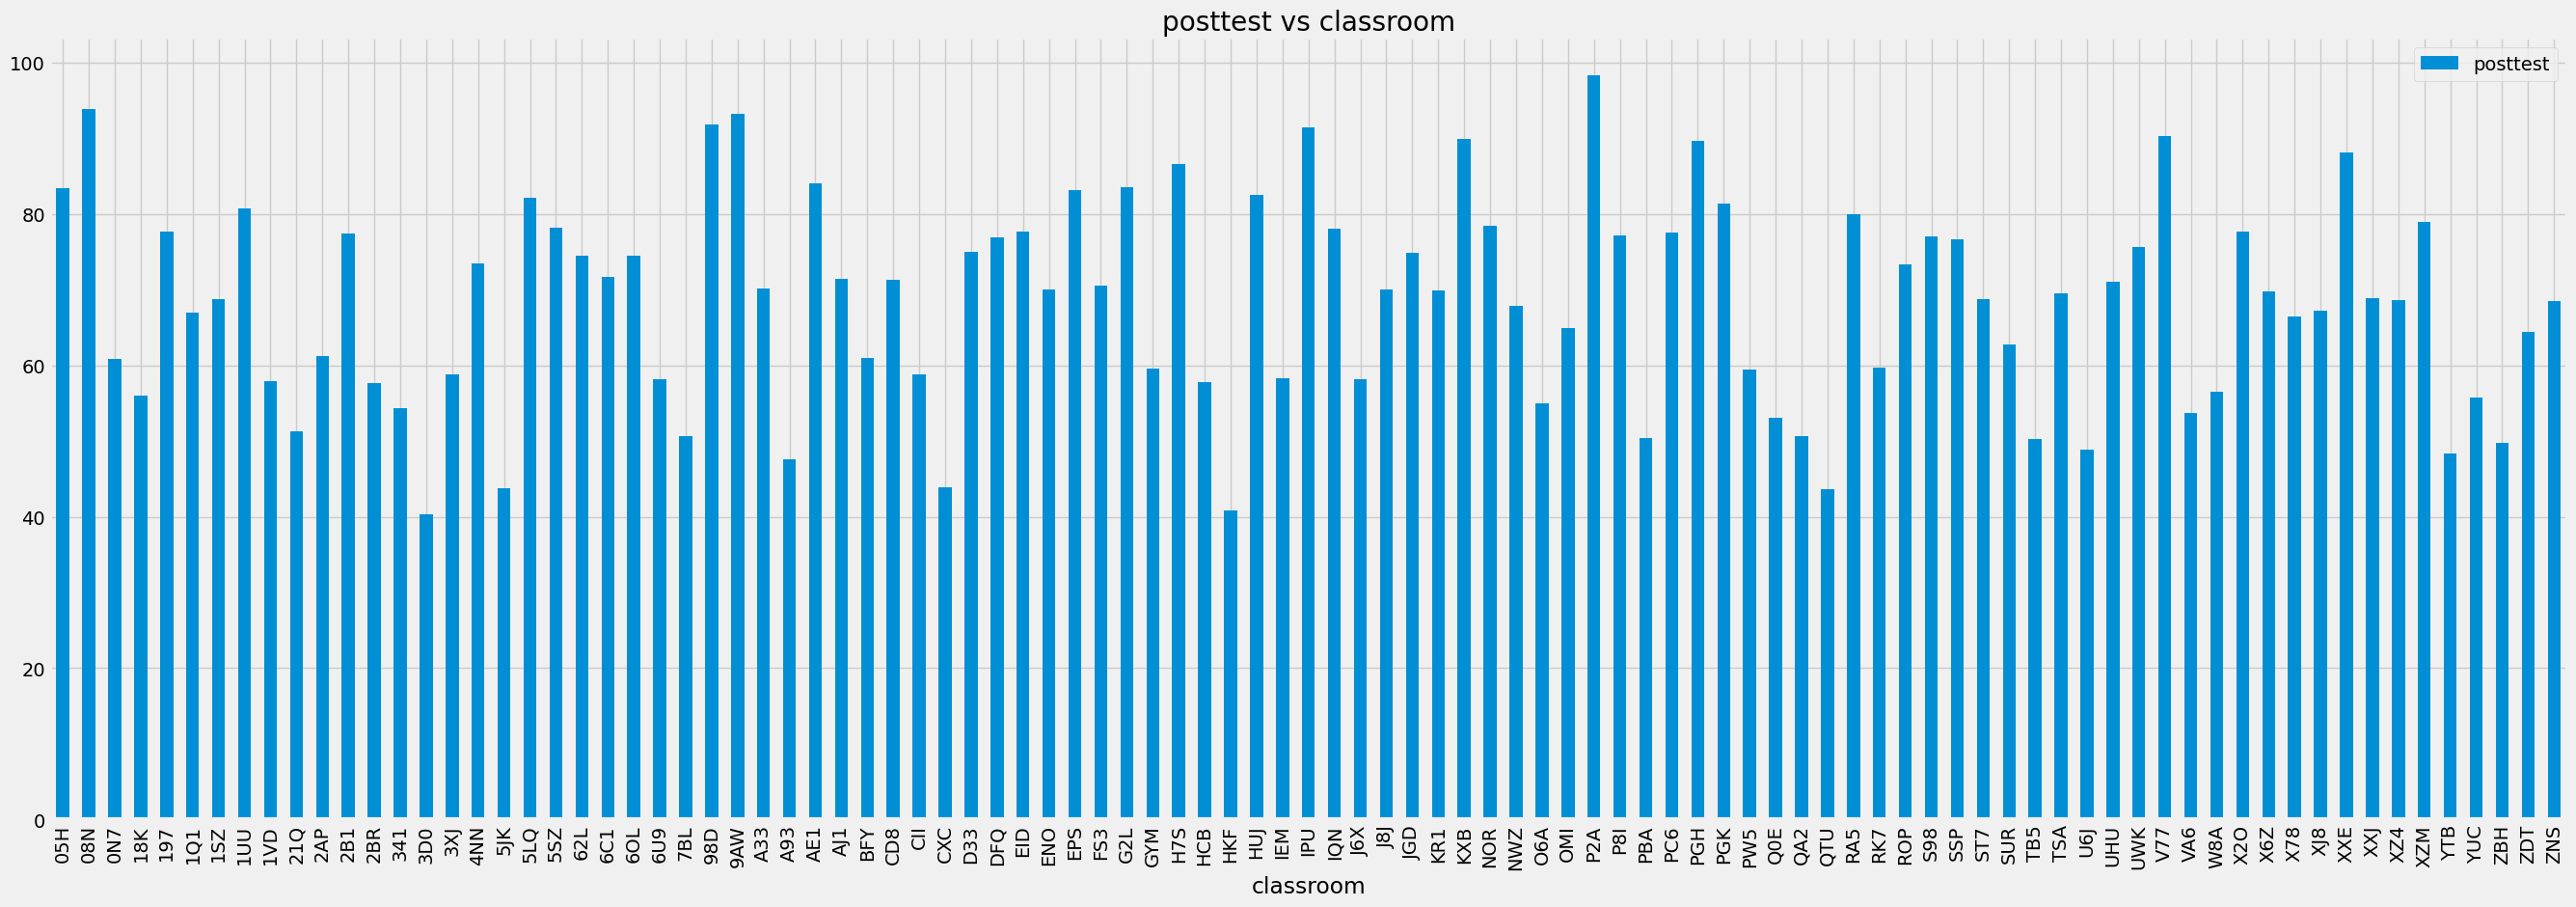

In [107]:
f, ax = plt.subplots(1,1, figsize = (30, 10))
data[['classroom','posttest']].groupby(['classroom']).mean().plot.bar(ax = ax)
ax.set_title('posttest vs classroom')
plt.show()

Также на этом графике видим неравномерно распрделение полученных оценок в каждом классе
Можно сделать вывод, что данный признак влияет на оценки 

**Определим зависмость оценок от имеет ли учащийся право на бесплатный/ субсидируемый обед или нет**

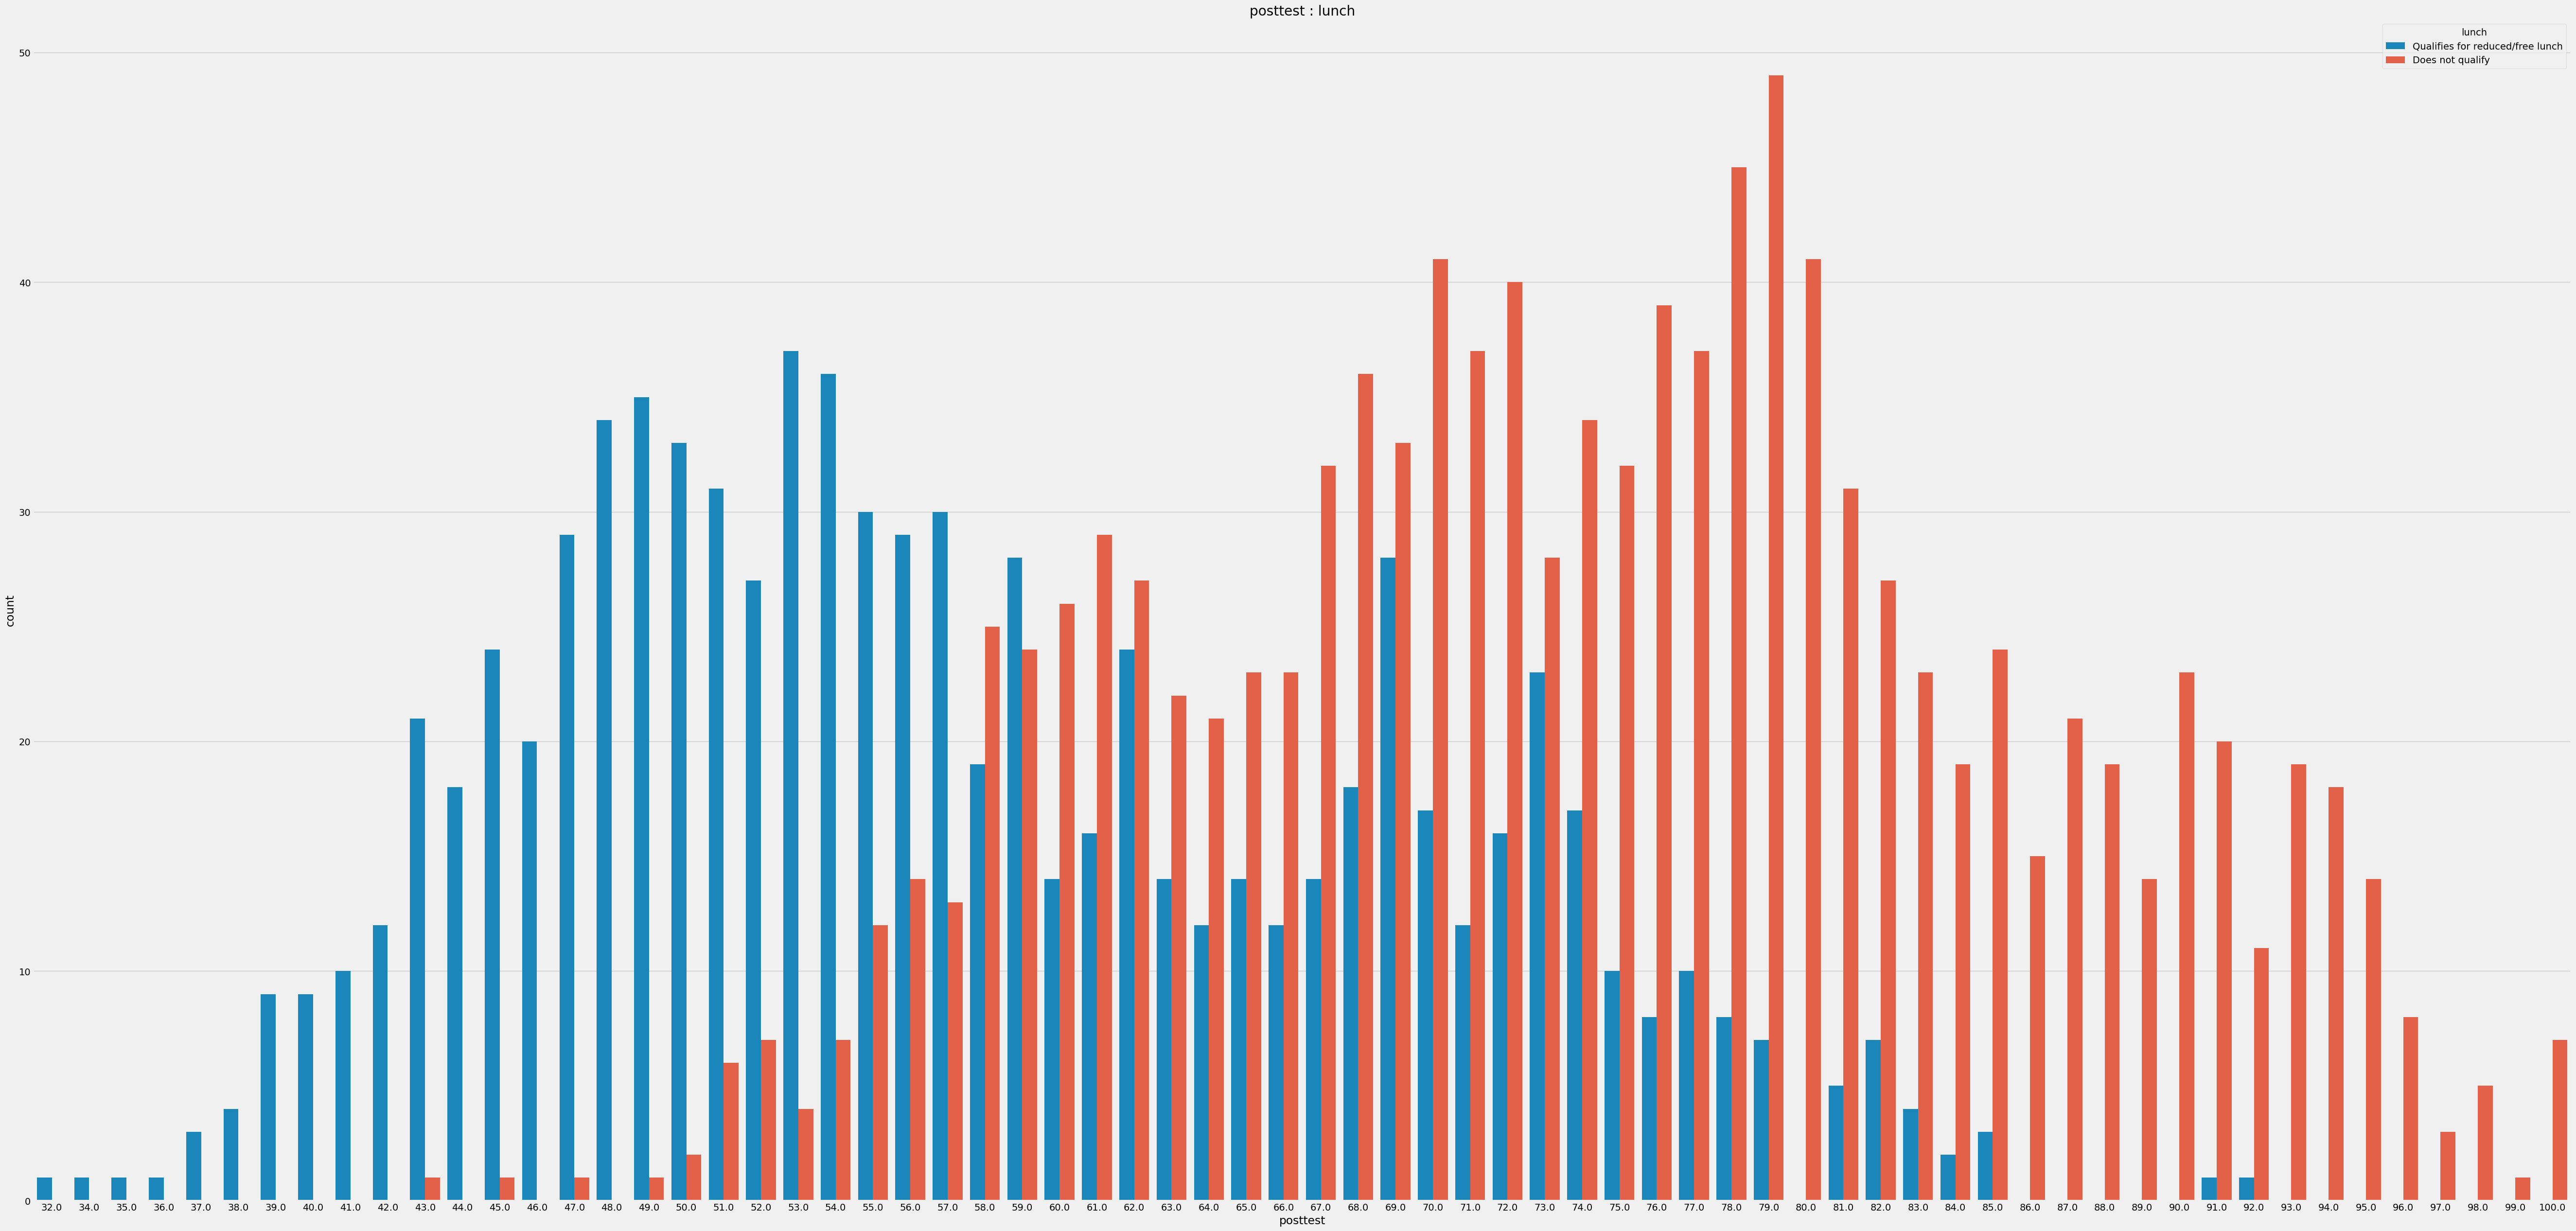

In [193]:
f, ax = plt.subplots(1, 1, figsize = (60, 30))
sns.countplot(x='posttest', hue = 'lunch', data = data,ax=ax)
ax.set_title('posttest : lunch')
plt.show()

данный график показал, что школьники без субсидируемого обеда получают высокие и средние баллы, по сравнению со шольниками, что получают бесплатный обед(график с ними смещем влево к низким баллам)

**Определим количественное и гендерное соотношение по признаку lunch**

In [202]:
pd.crosstab(data.lunch, data.gender, margins = True).style.background_gradient(cmap = 'summer_r')

небольшая разница между школьниками, кто получает и не получает обед, следовательно предположение выше - верное, и это не зависит от количества школьников в датасете и пола

**Определим зависмость оценок от пробных оценок**

Text(0.5, 1.0, 'posttest vs pretest')

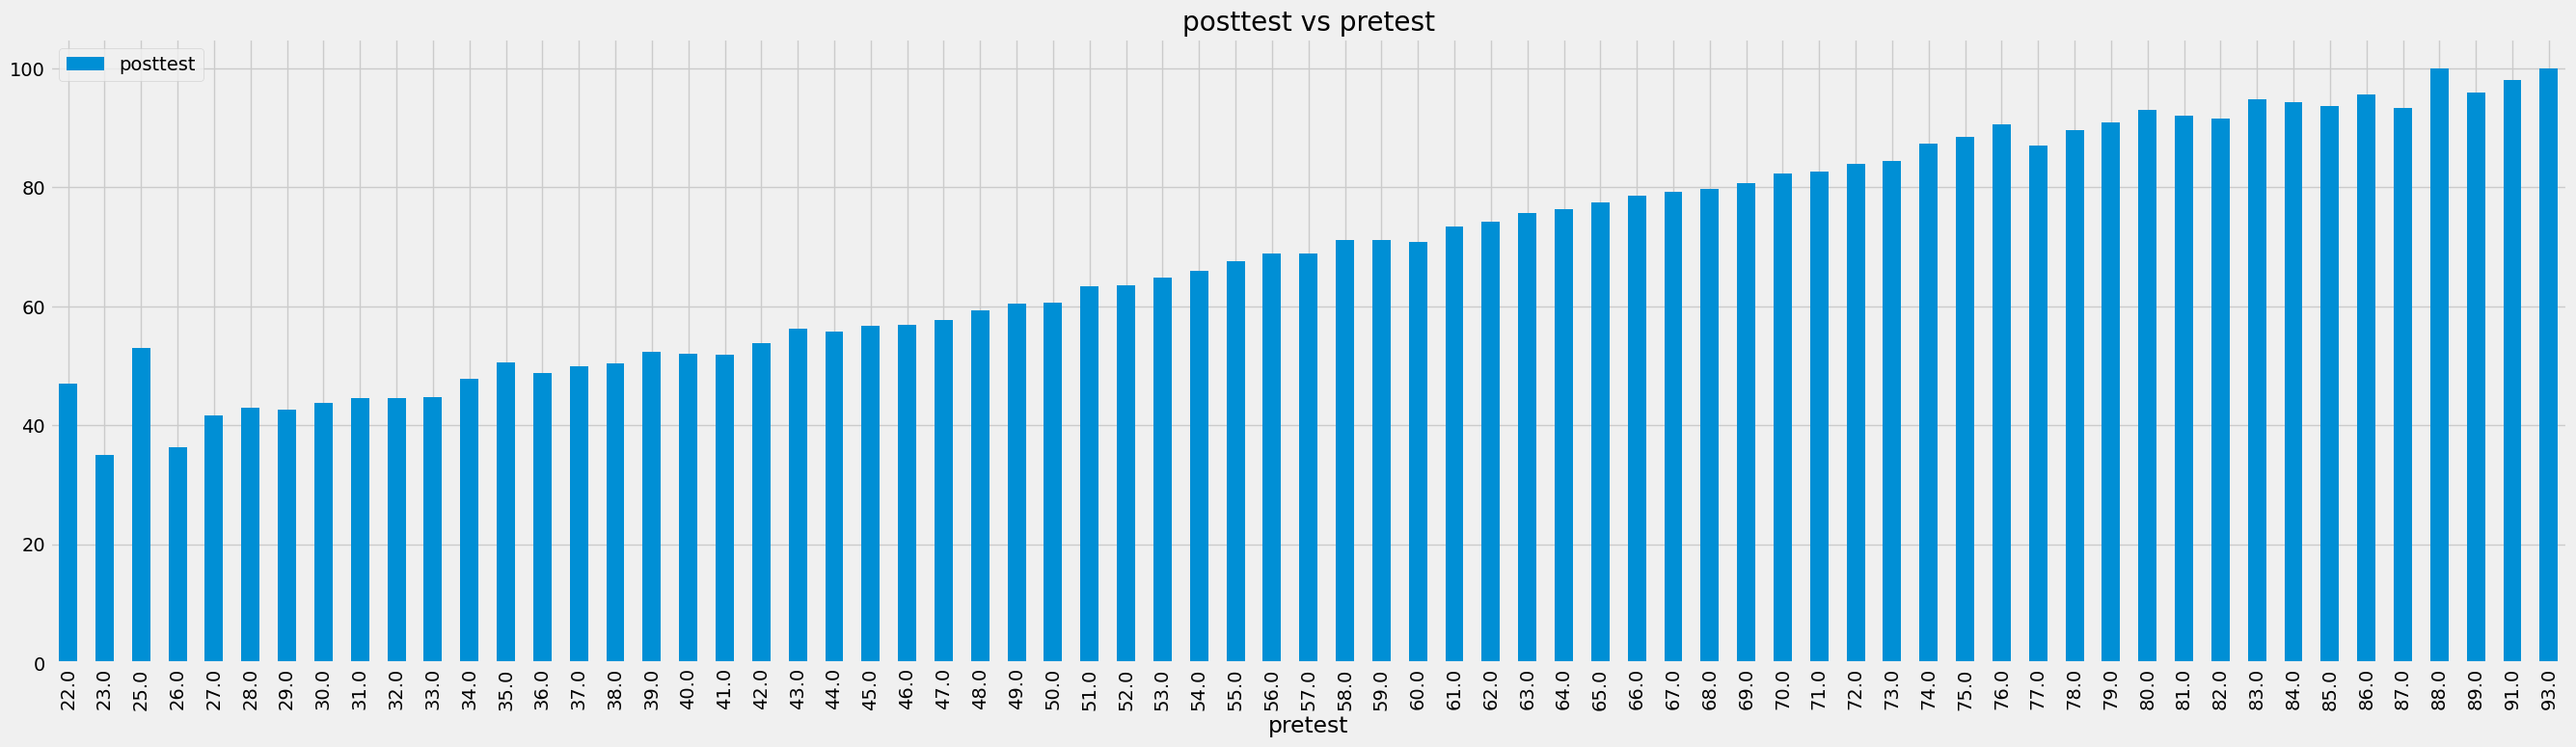

In [194]:
#рассмотрим зависимость преоценок и послетестовые
f, ax = plt.subplots(1, 1, figsize = (30, 8))
data[['pretest','posttest']].groupby(['pretest']).mean().plot.bar(ax = ax)
ax.set_title('posttest vs pretest')
#!!! сделать линией posttest и pretest

в данном случае претестовая оценка и послетестовая имеют почти единичную зависимость(послетестовая оценка чаще всего выше,чем предтестовая) Следовательно данный признак помогает с высокой точностью определить послетестовую оценку(она будет равна предтестовой,либо больше)

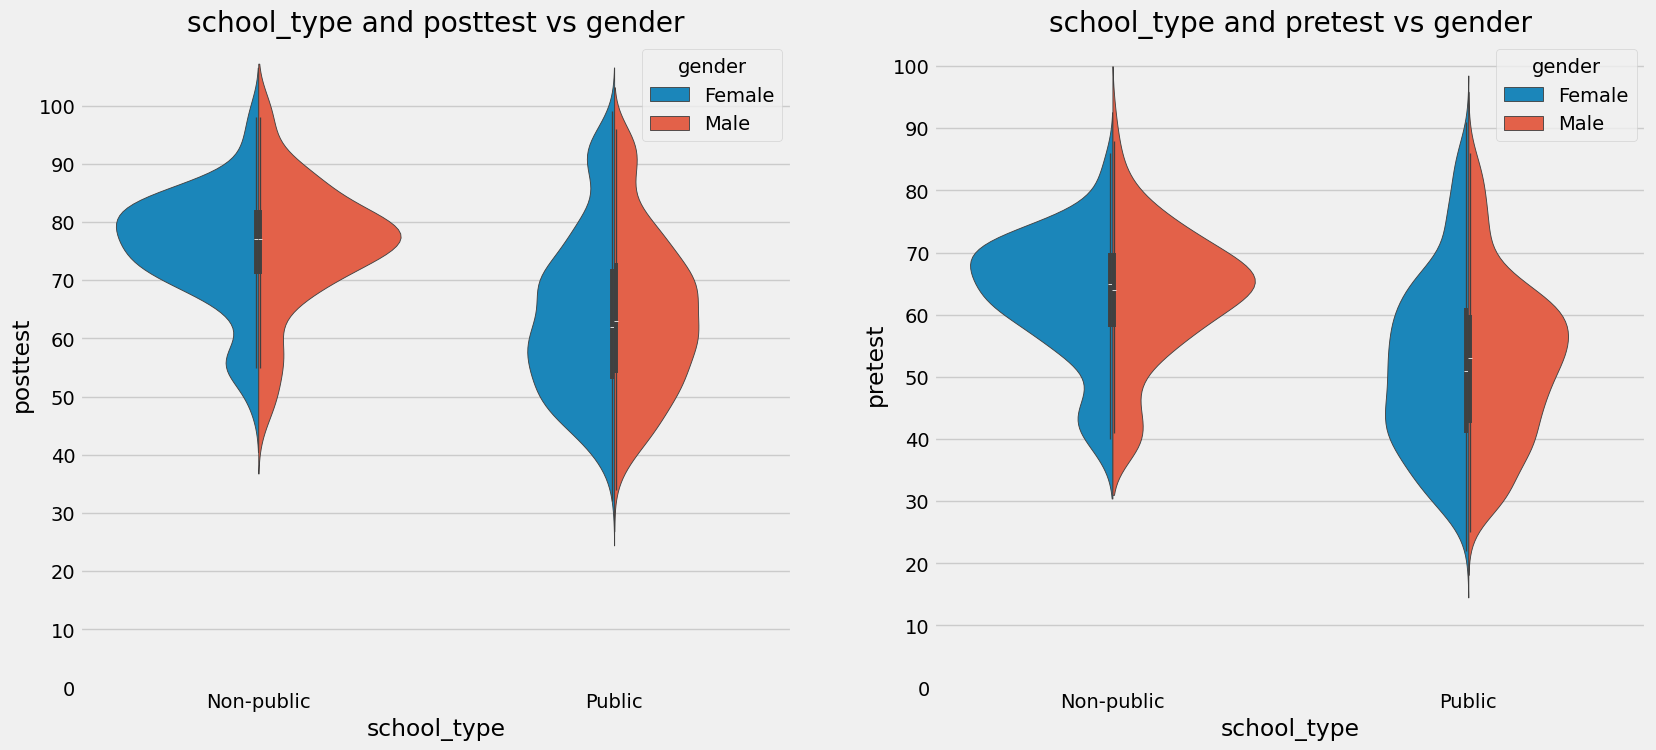

In [195]:
#тип школы и гендер
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot(x="school_type", y='posttest', hue = "gender", data = data, split = True, ax = ax[0])
ax[0].set_title('school_type and posttest vs gender')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="school_type", y='pretest', hue = "gender", data = data, split = True, ax = ax[1])
ax[1].set_title('school_type and pretest vs gender')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

данный график подтверждает рассуждения выше, баллы не зависят от пола и чаще всего послетестовая оценка, выше предтестовой. Тип школы же в данном графике: в непубличной школе школьники получают баллы от 70 до 90 баллов в послетестовой оценке, в публичной же виолончель смещена вниз, что значит низкие баллы

Появляется противоечие, в данном случае непубличная школа чаще получает высокие и средние баллы, но выше в рассуждения пришли к публичной школе UKPGS, где выше шанс получить высокие баллы в публичной школе! Это еще раз подтверждает проверку этого признака, о его влияении на оценку

**Добавление новых признаков в таблицу!**

Text(0.5, 1.0, 'school and posttest_mean_by_school')

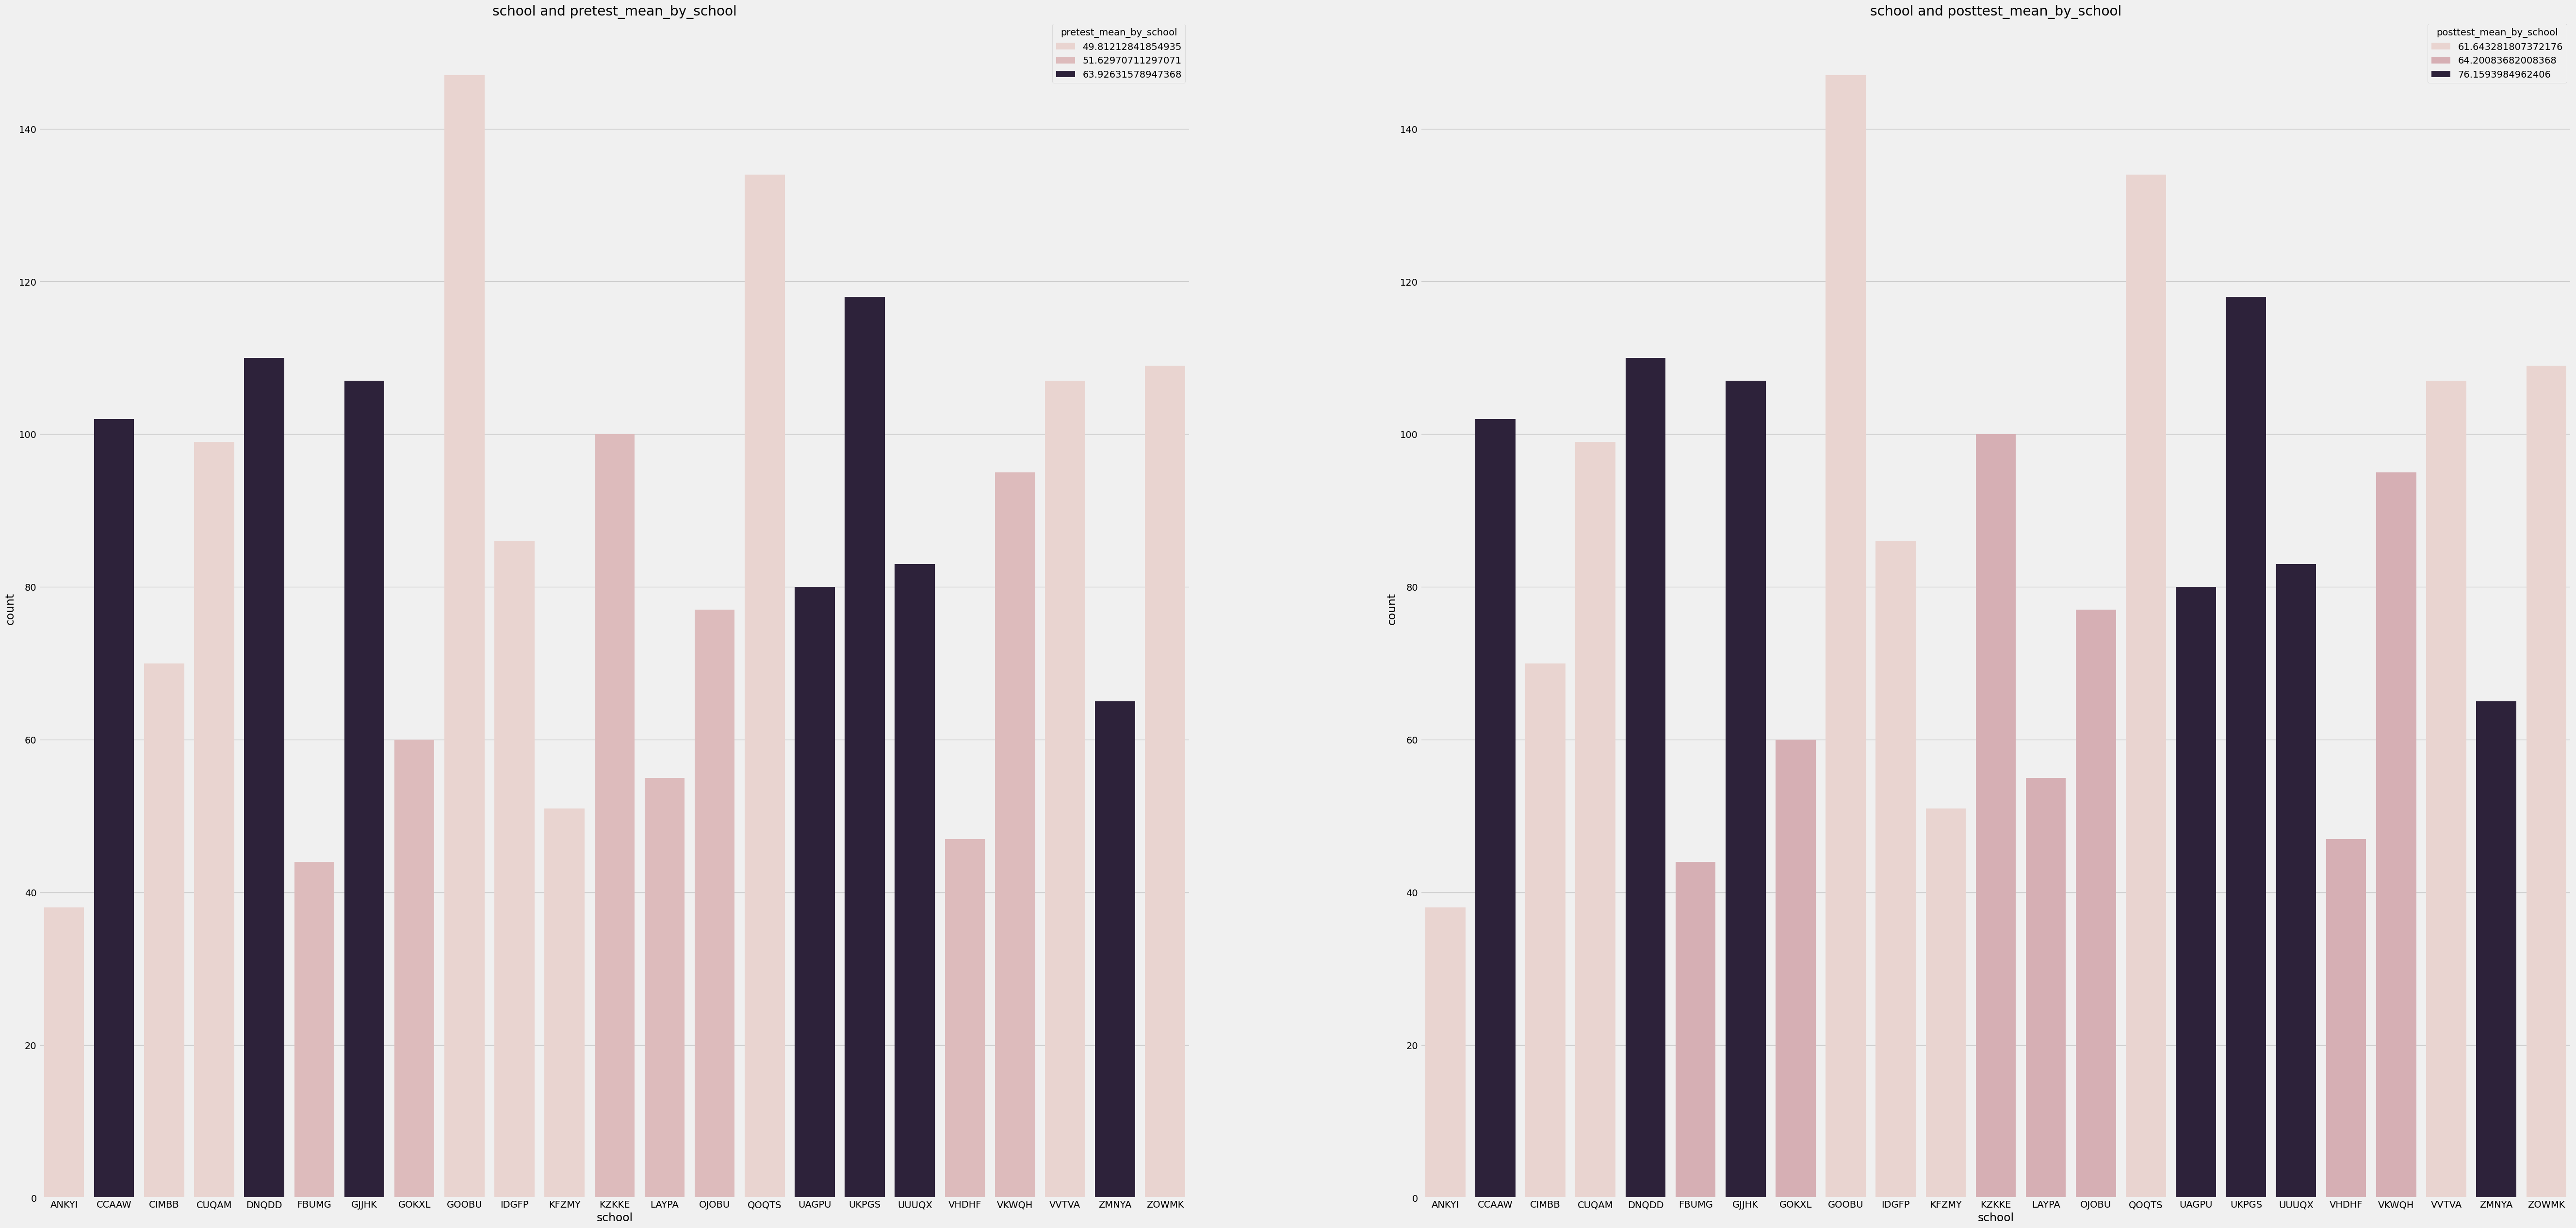

In [145]:
#добавление признаков, претестовая средняя по школе и послетестовая средняя по школе и по городам,селам,пригородам
data = data.assign(pretest_mean_by_school=data.groupby('school_setting')['pretest'].transform('mean'))
data = data.assign(posttest_mean_by_school=data.groupby('school_setting')['posttest'].transform('mean'))
data = data.assign(pretest_mean_by_school_setting=data.groupby('school')['pretest'].transform('mean'))
data = data.assign(posttest_mean_by_school_setting=data.groupby('school')['posttest'].transform('mean'))
f, ax = plt.subplots(1, 2, figsize = (60, 30))
sns.countplot(x='school', hue = 'pretest_mean_by_school', data = data, ax=ax[0])
ax[0].set_title('school and pretest_mean_by_school')
sns.countplot(x='school', hue = 'posttest_mean_by_school', data = data, ax=ax[1])
ax[1].set_title('school and posttest_mean_by_school')

Text(0.5, 1.0, 'school_setting and posttest_mean_by_school_setting')

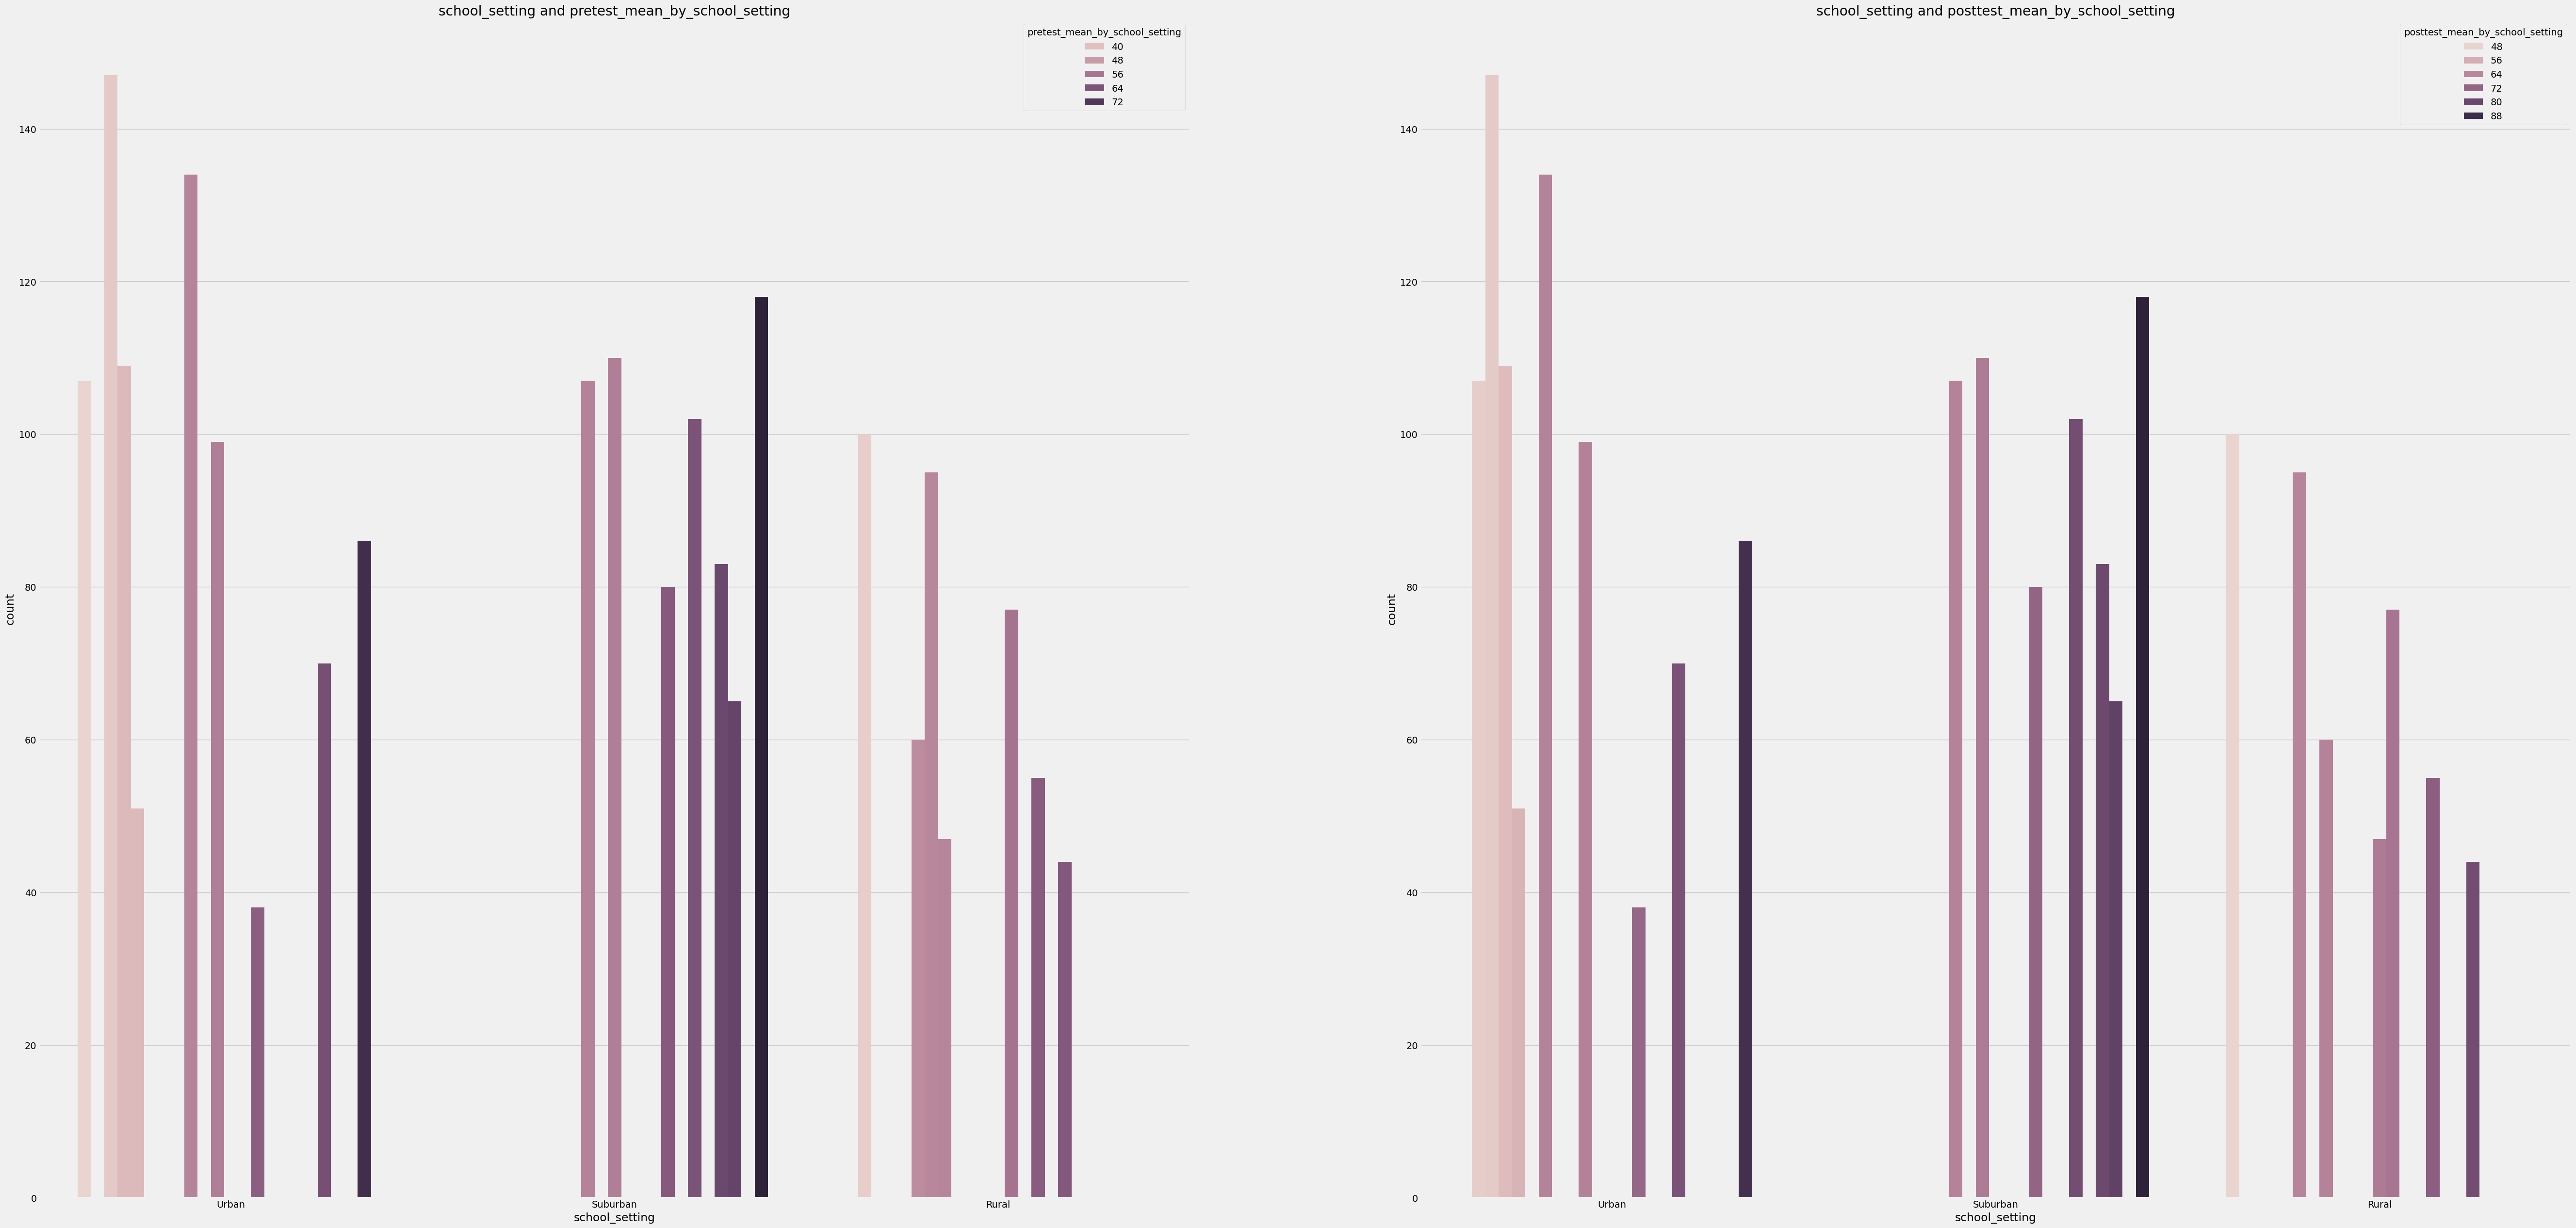

In [143]:
f, ax = plt.subplots(1, 2, figsize = (60, 30))
sns.countplot(x='school_setting', hue = 'pretest_mean_by_school_setting', data = data, ax=ax[0])
ax[0].set_title('school_setting and pretest_mean_by_school_setting')
sns.countplot(x='school_setting', hue = 'posttest_mean_by_school_setting', data = data, ax=ax[1])
ax[1].set_title('school_setting and posttest_mean_by_school_setting')

In [147]:
data.head()

school school_setting school_type classroom teaching_method  n_student  \
0  ANKYI          Urban  Non-public       6OL        Standard       20.0   
1  ANKYI          Urban  Non-public       6OL        Standard       20.0   
2  ANKYI          Urban  Non-public       6OL        Standard       20.0   
3  ANKYI          Urban  Non-public       6OL        Standard       20.0   
4  ANKYI          Urban  Non-public       6OL        Standard       20.0   

  student_id  gender             lunch  pretest  posttest  \
0      2FHT3  Female  Does not qualify     62.0      72.0   
1      3JIVH  Female  Does not qualify     66.0      79.0   
2      3XOWE    Male  Does not qualify     64.0      76.0   
3      556O0  Female  Does not qualify     61.0      77.0   
4      74LOE    Male  Does not qualify     64.0      76.0   

   n_student_mean_by_school  pretest_mean_by_school  posttest_mean_by_school  \
0                 25.252081               49.812128                61.643282   
1                 25.252081               49.812128                61.643282   
2                 25.252081               49.812128                61.643282   
3                 25.252081               49.812128                61.643282   
4                 25.252081               49.812128                61.643282   

   pretest_mean_by_school_setting  posttest_mean_by_school_setting  
0                       61.289474                        71.315789  
1                       61.289474                        71.315789  
2                       61.289474                        71.315789  
3                       61.289474                        71.315789  
4                       61.289474                        71.315789

**Вывод:** Какие признаки в итоге необходимы:
School
School-setting 
School type
Classroom
teaching metod
n_student 
lunch
pretest

